In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
import calendar
import numpy as np
import pandas as pd
from joblib import load

from helper import *

In [3]:
showings = load('../data/showings_extra_feature.joblib')
showings.replace(np.inf, 0, inplace=True)

# Coverage per hour per day per year

In [6]:
%%time
stats_prime = dict()
stats_early = dict()
for i in range(2007, 2021):
    stats_prime[i] = dict()
    stats_early[i] = dict()
    temp_year = showings.loc[showings.year == i]
    for j in range(7):
        temp_day = temp_year.loc[temp_year.dayofweek == j, ('showtime', 'coverage')]
        stats_prime[i][calendar.day_name[j]] = dict()
        stats_early[i][calendar.day_name[j]] = dict()
        for k in range(24):
            if k == 23 or k < 9: continue
            elif k < 10:
                stats_early[i][calendar.day_name[j]]['0' + str(k) + ':00-0' + str(k) + ':59'] = temp_day.loc[temp_day.hour == k, 'coverage']
            elif k < 16:
                stats_early[i][calendar.day_name[j]][str(k) + ':00-' + str(k) + ':59'] = temp_day.loc[temp_day.hour == k, 'coverage']
            else:
                stats_prime[i][calendar.day_name[j]][str(k) + ':00-' + str(k) + ':59'] = temp_day.loc[temp_day.hour == k, 'coverage']

Wall time: 3.51 s


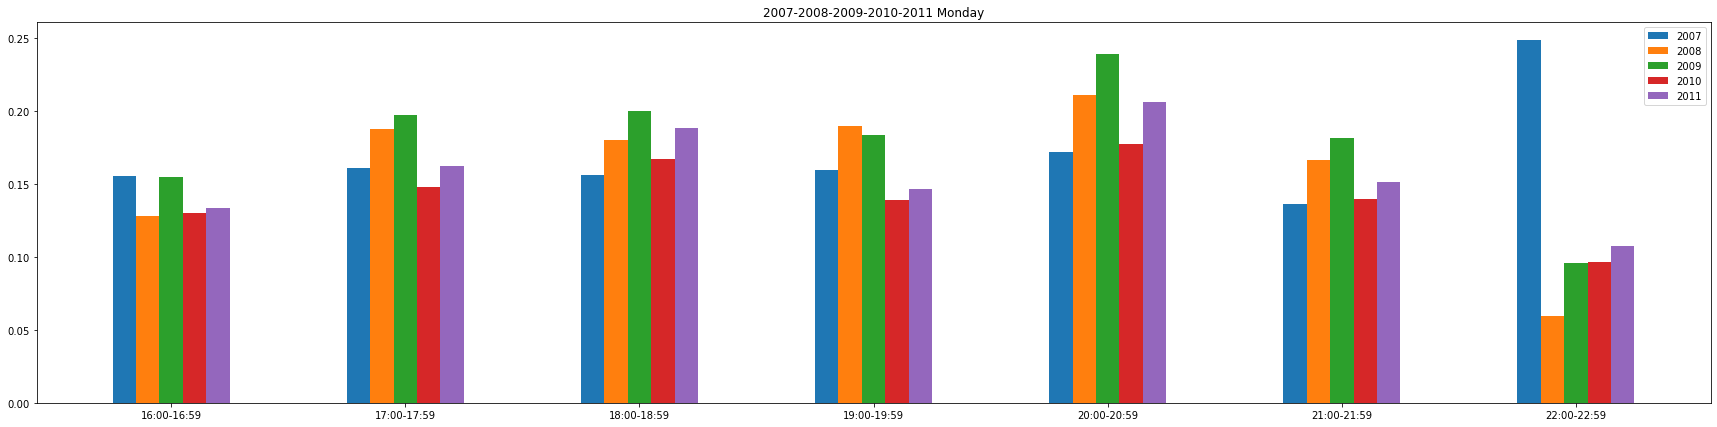

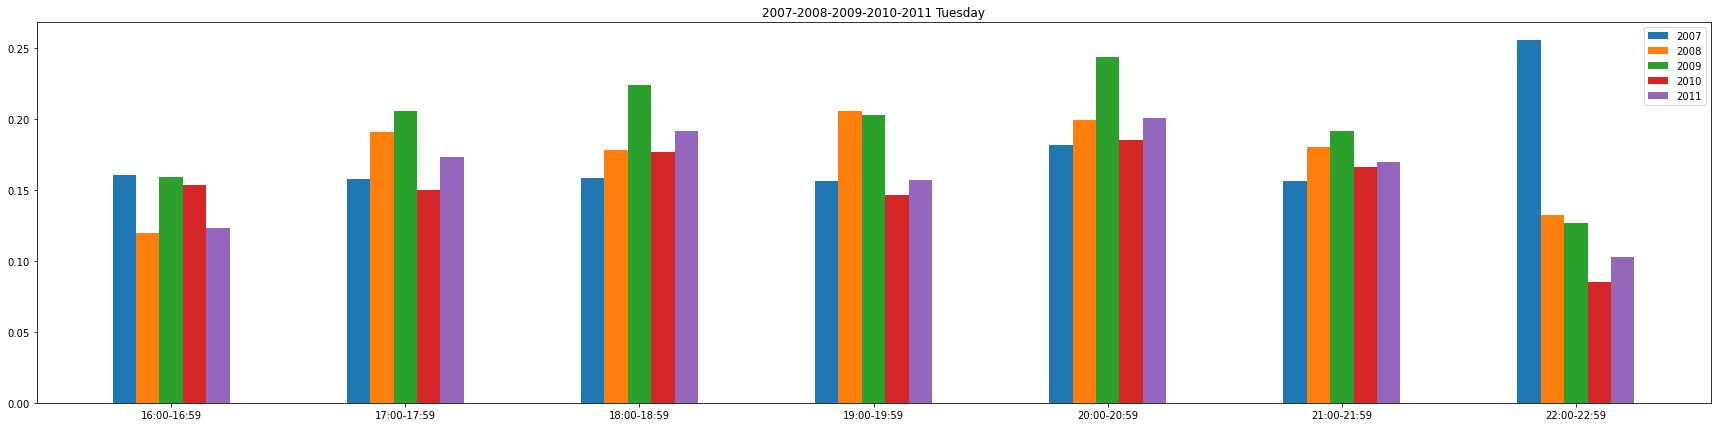

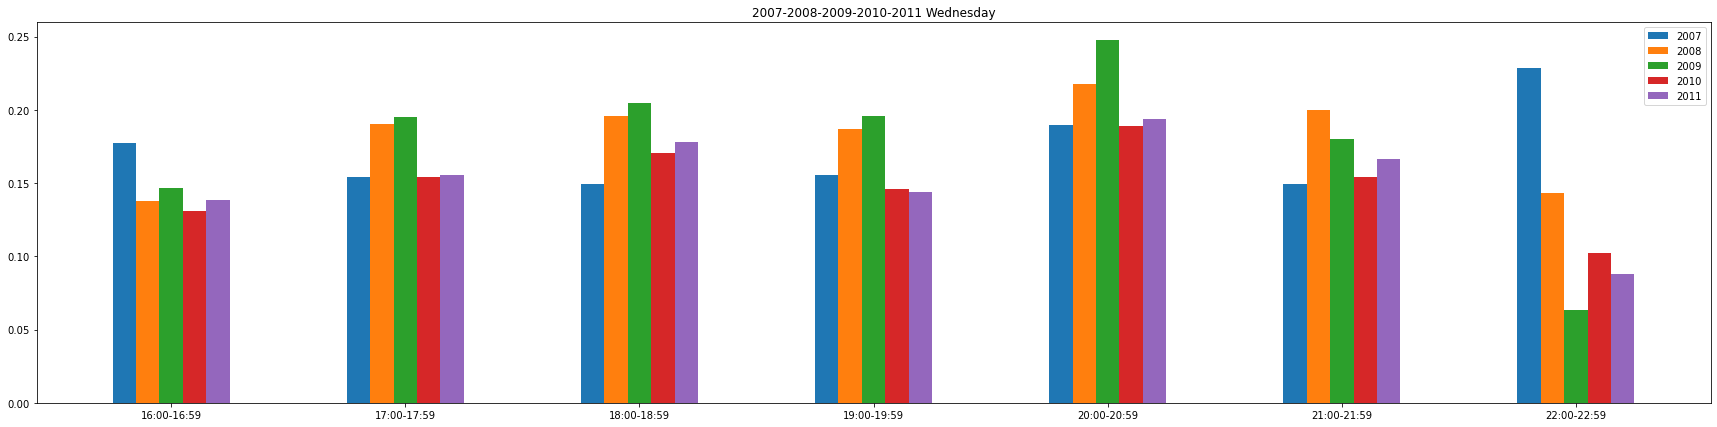

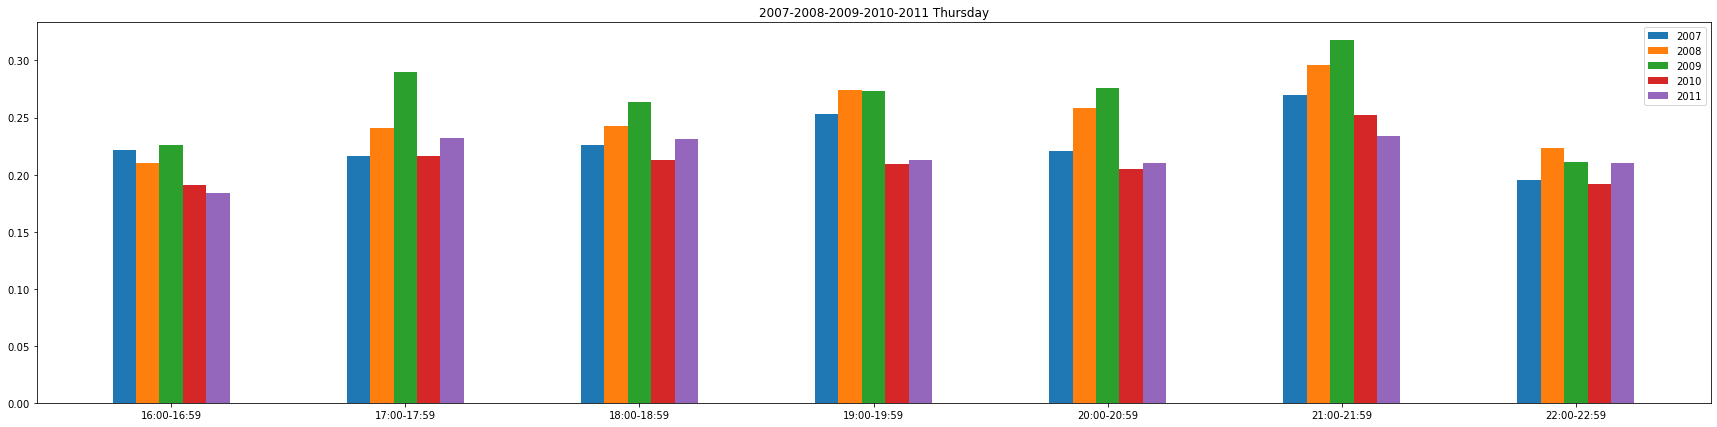

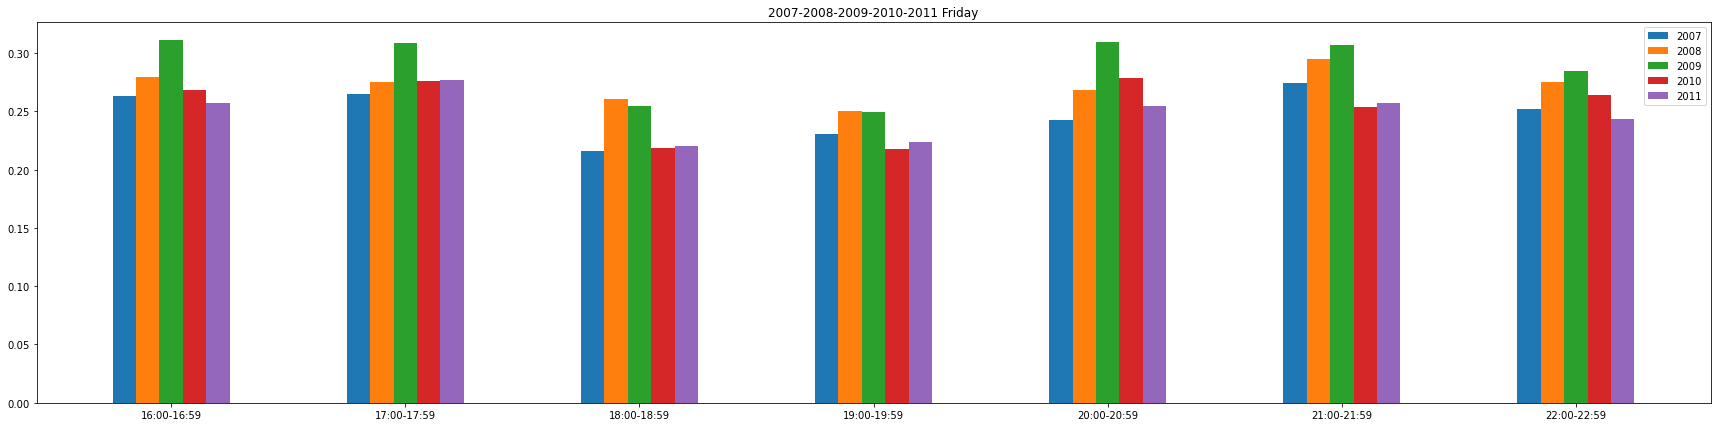

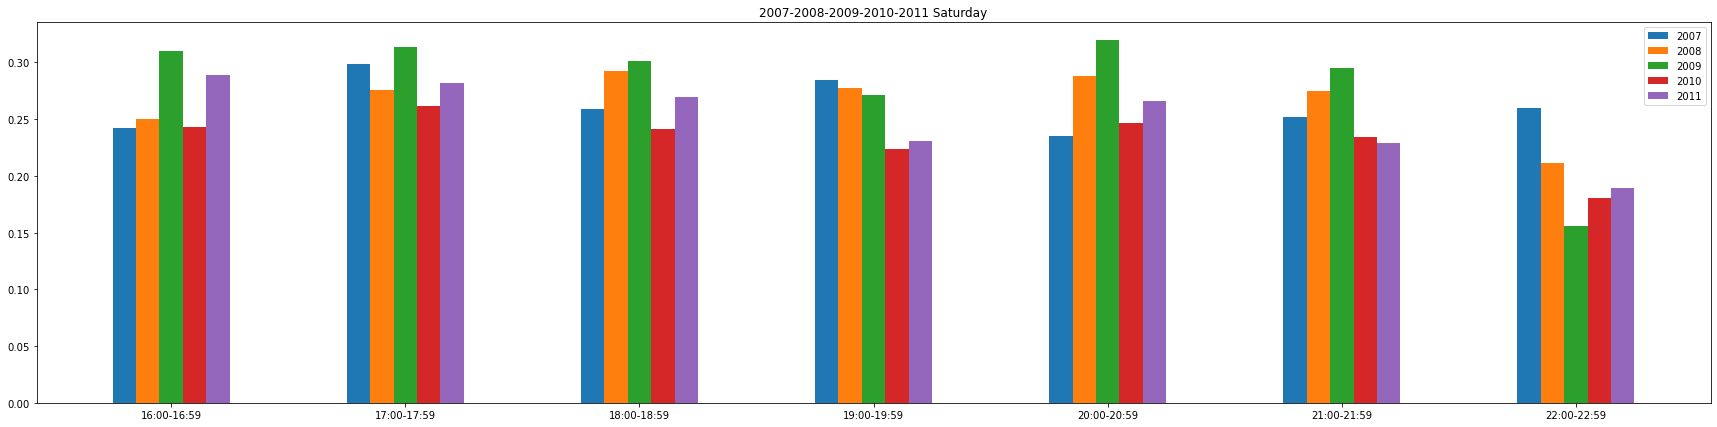

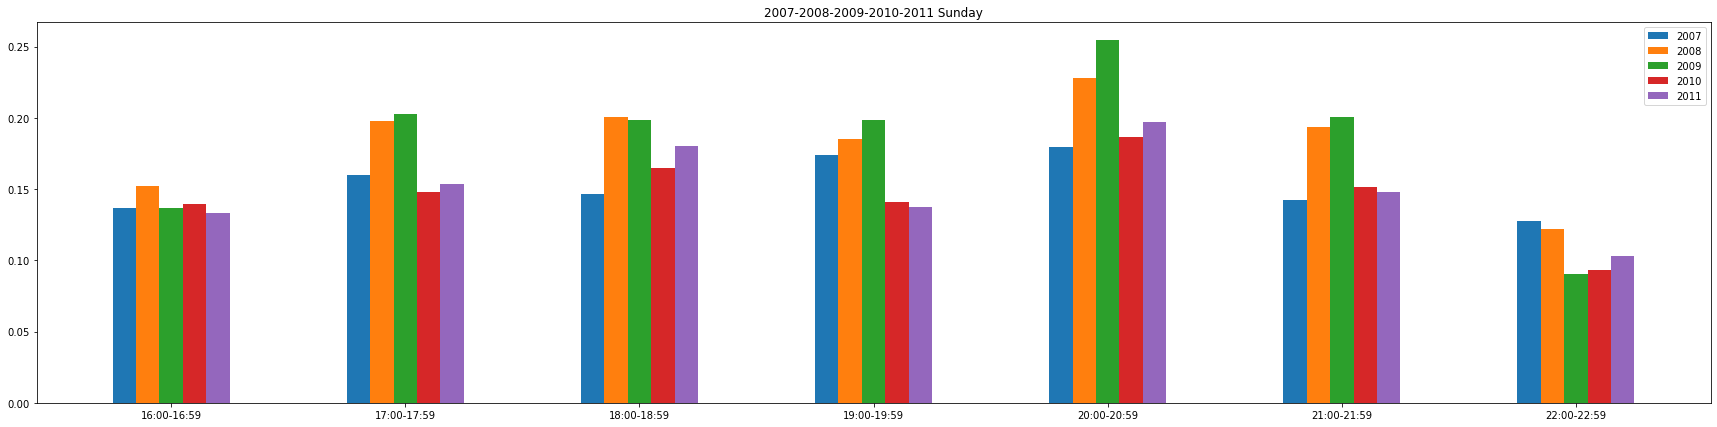

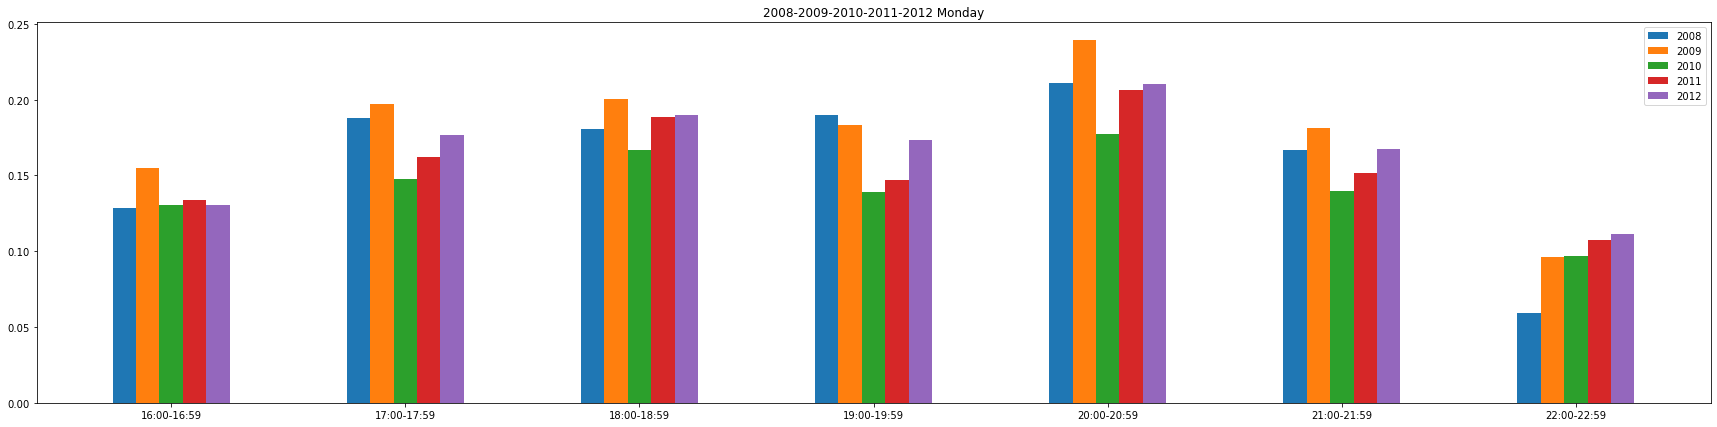

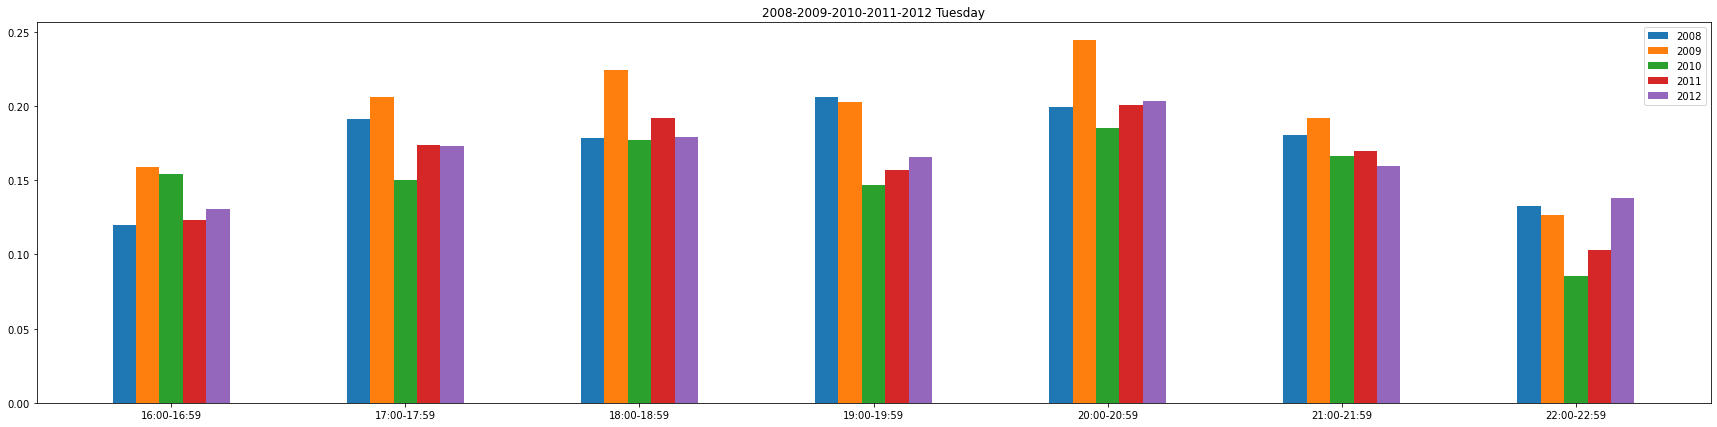

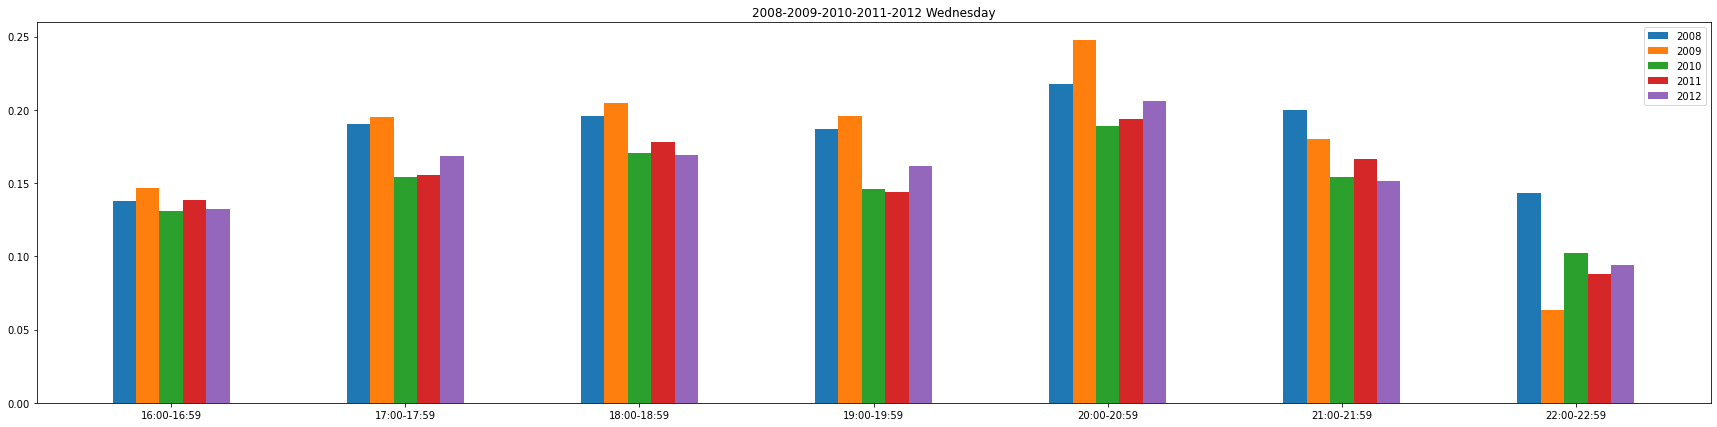

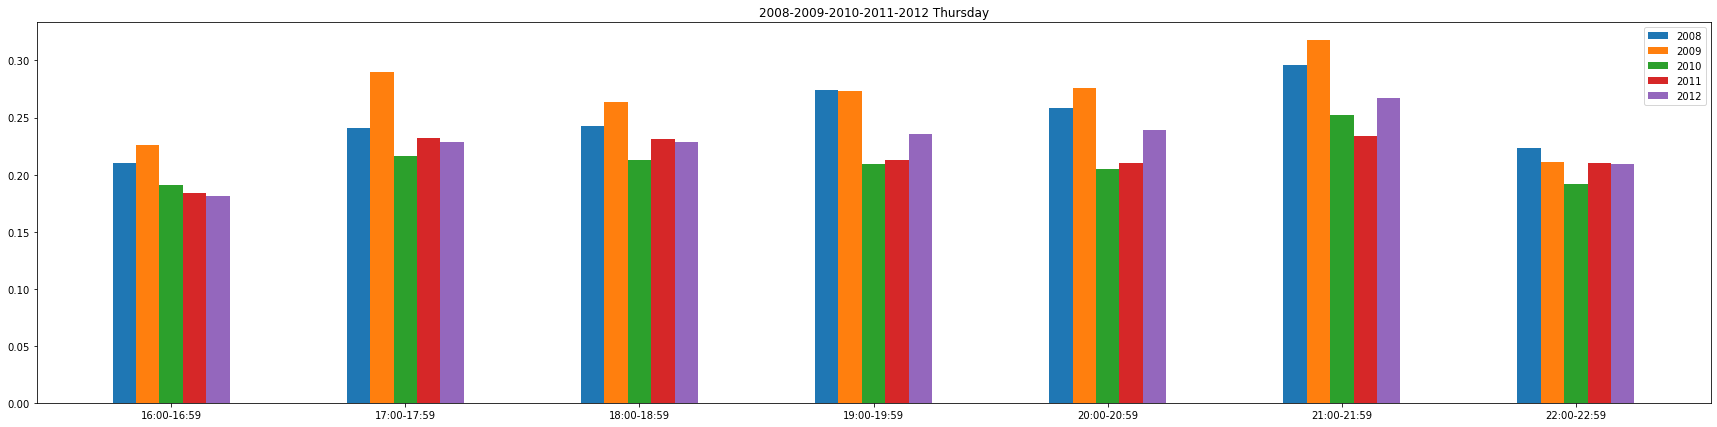

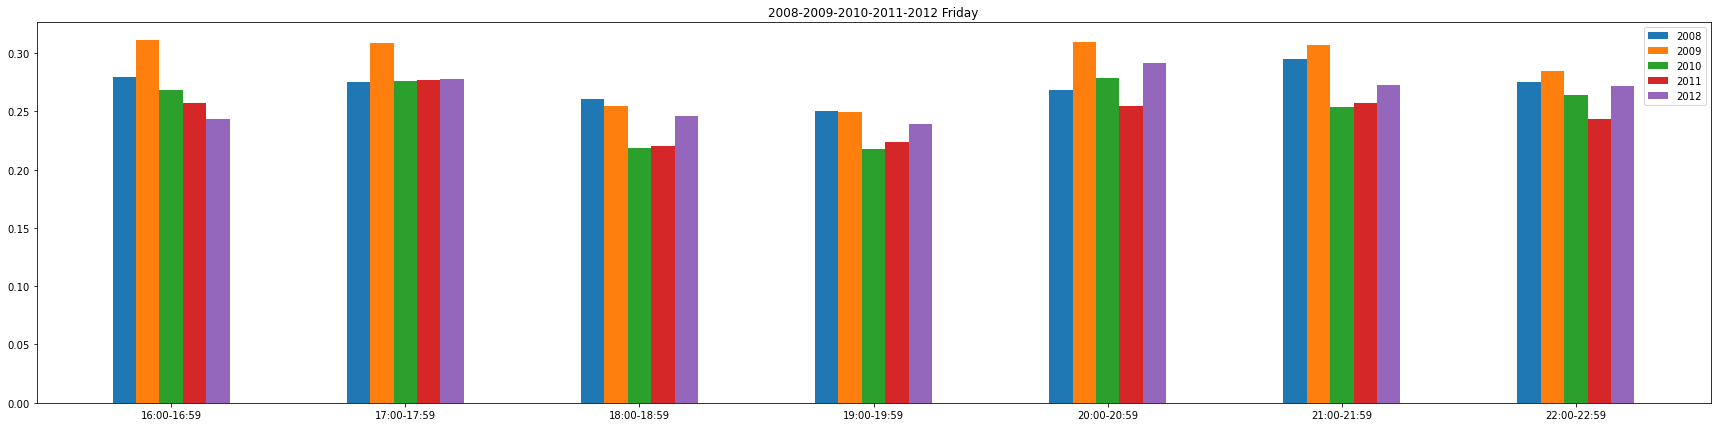

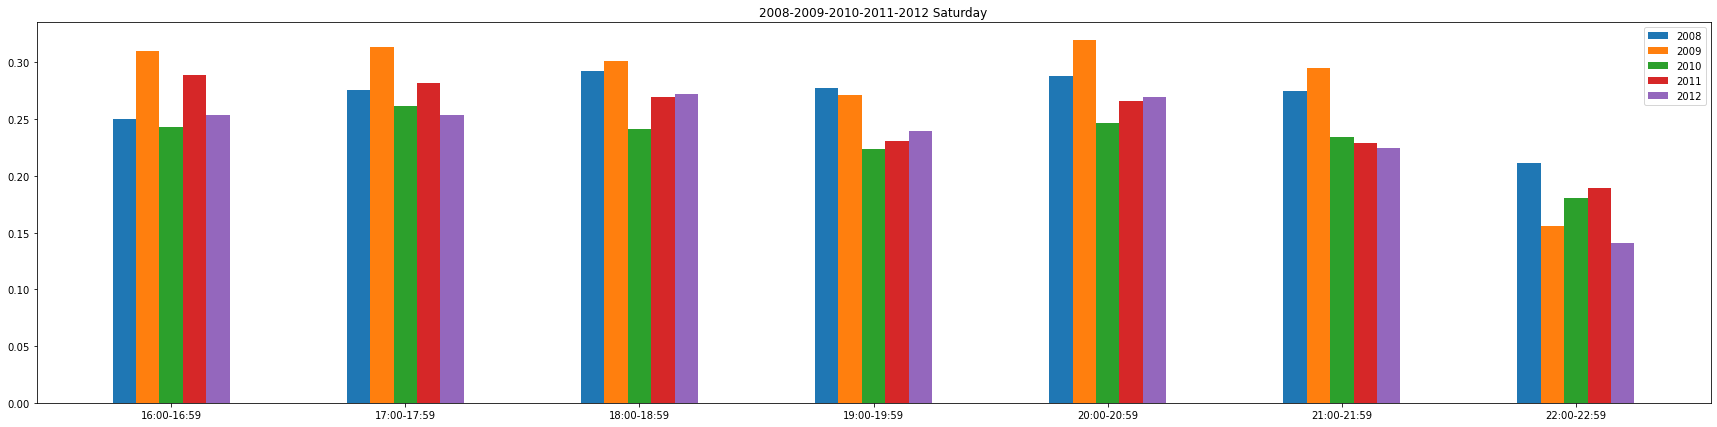

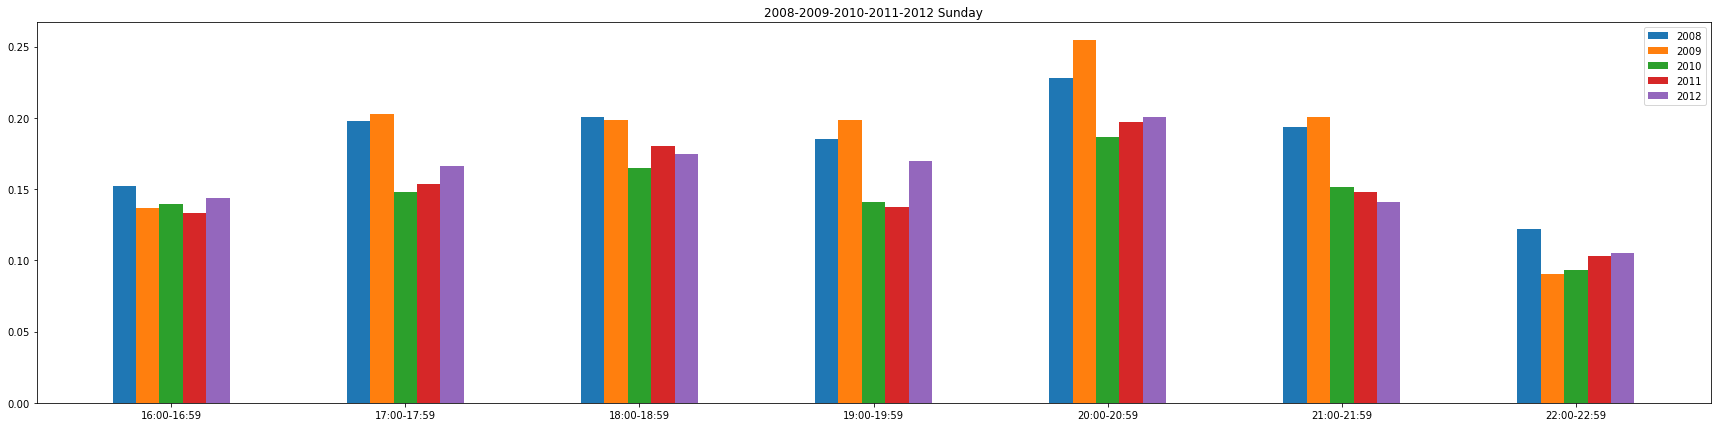

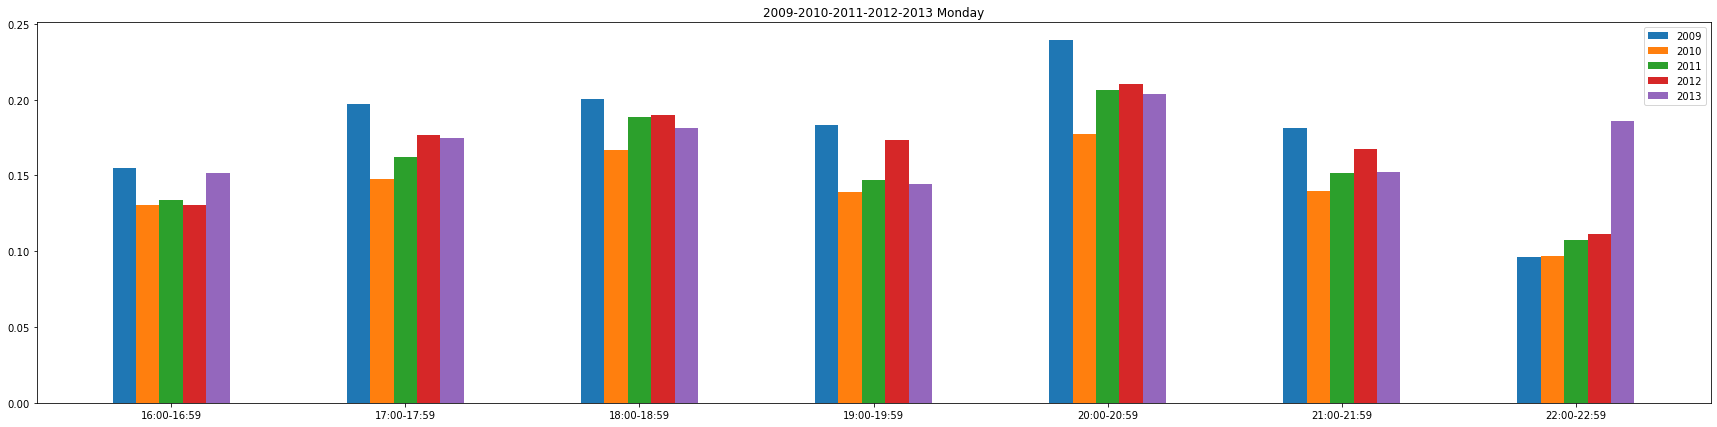

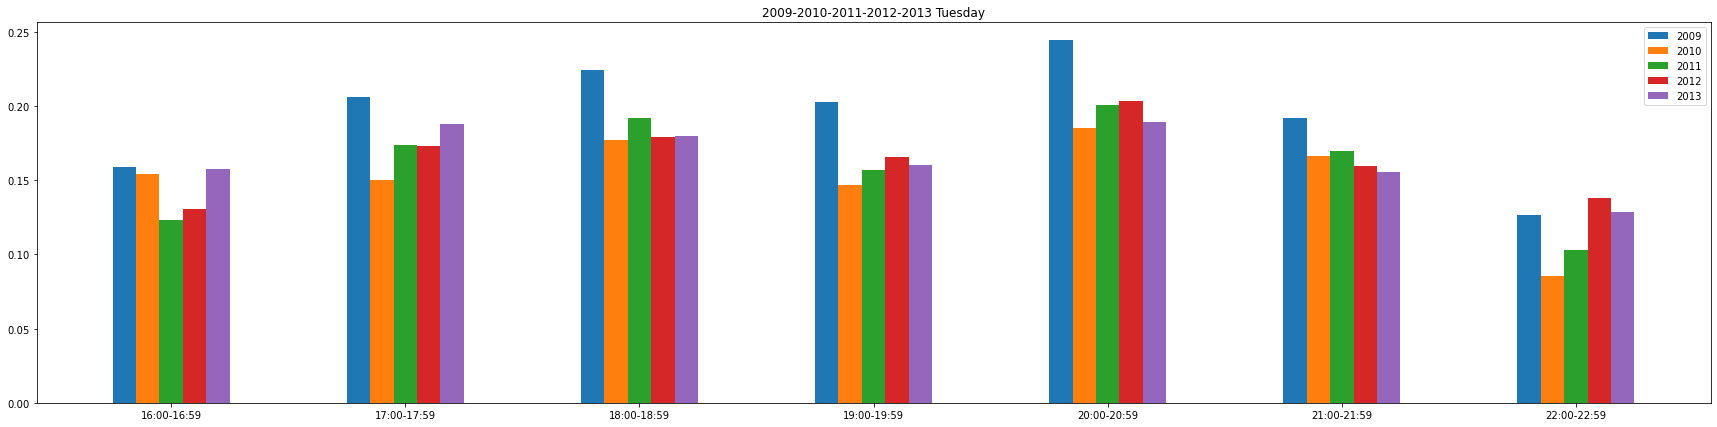

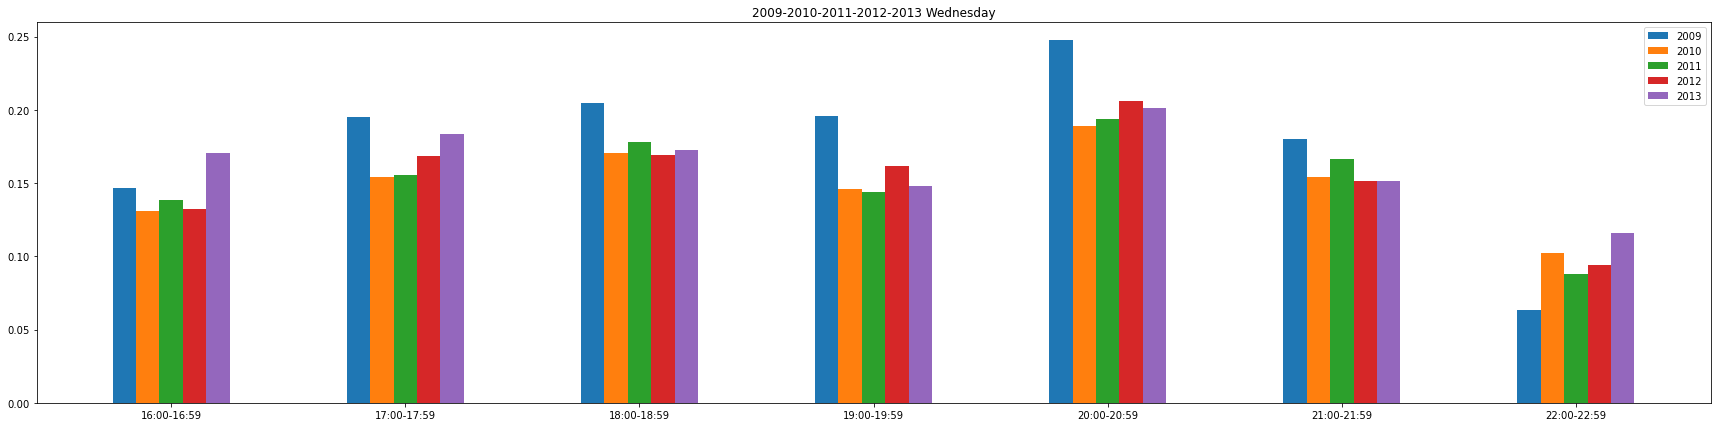

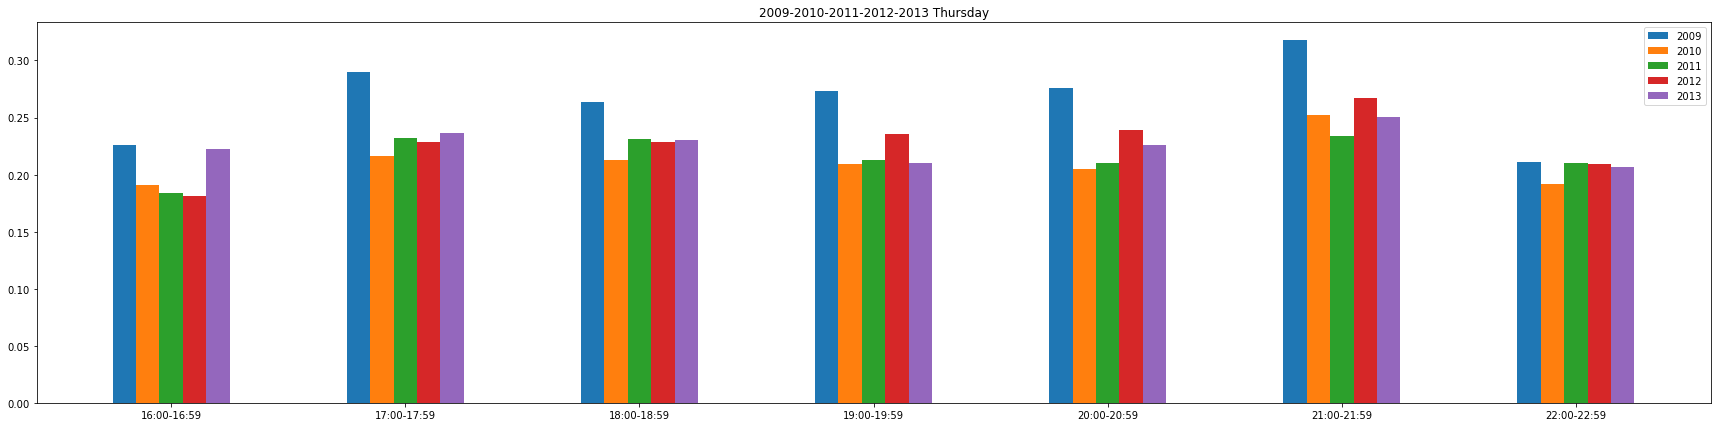

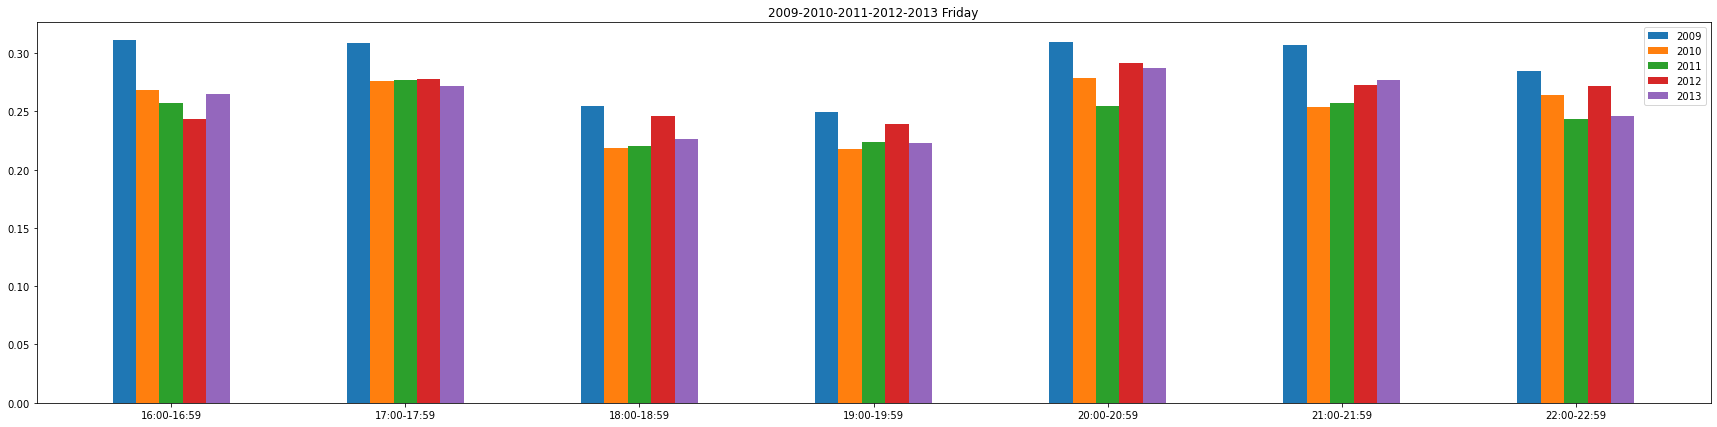

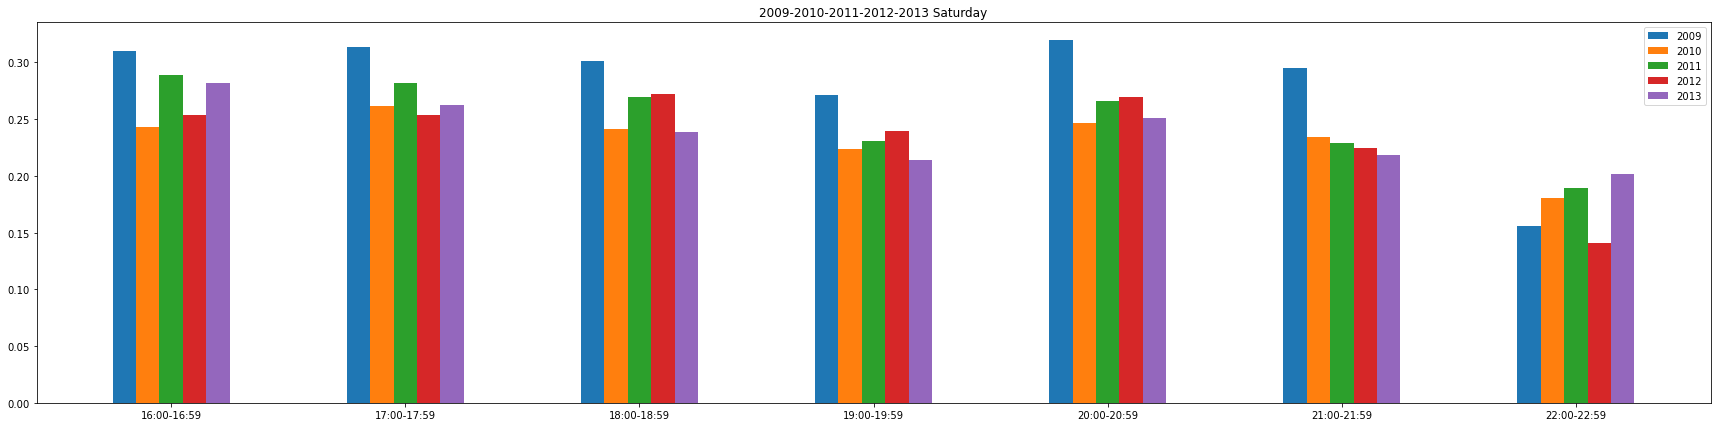

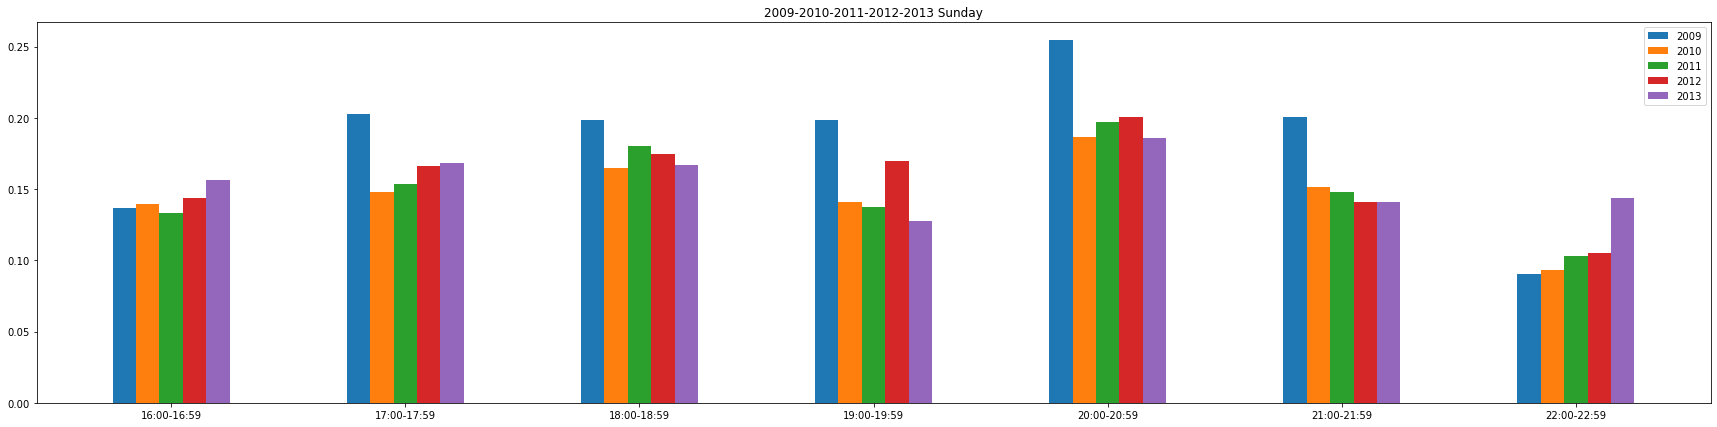

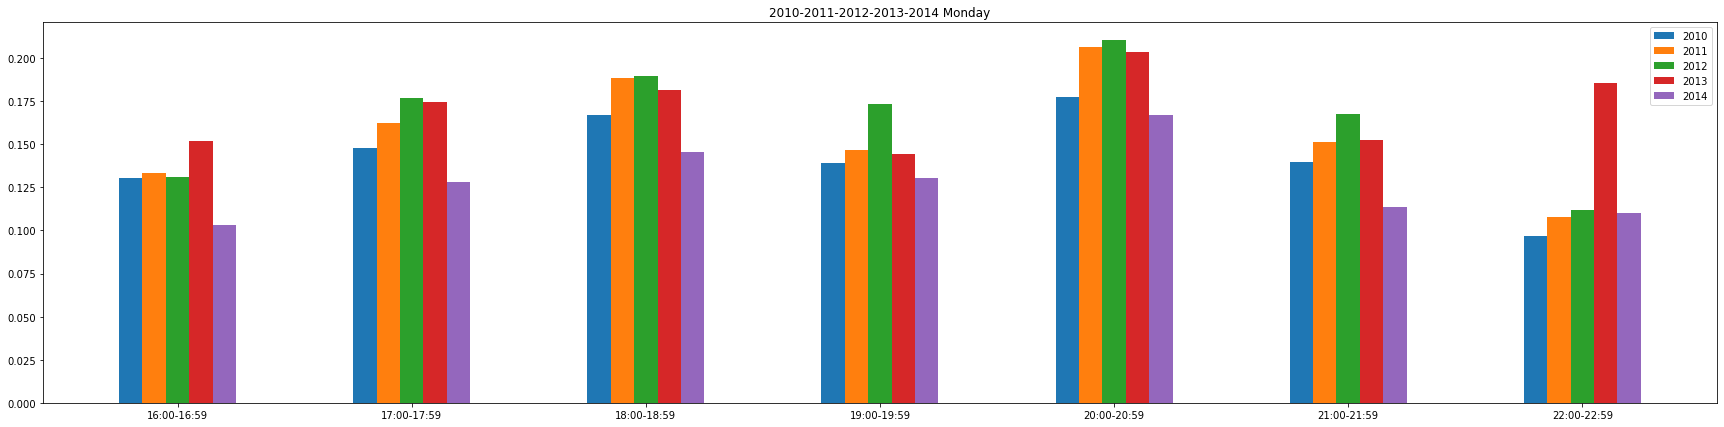

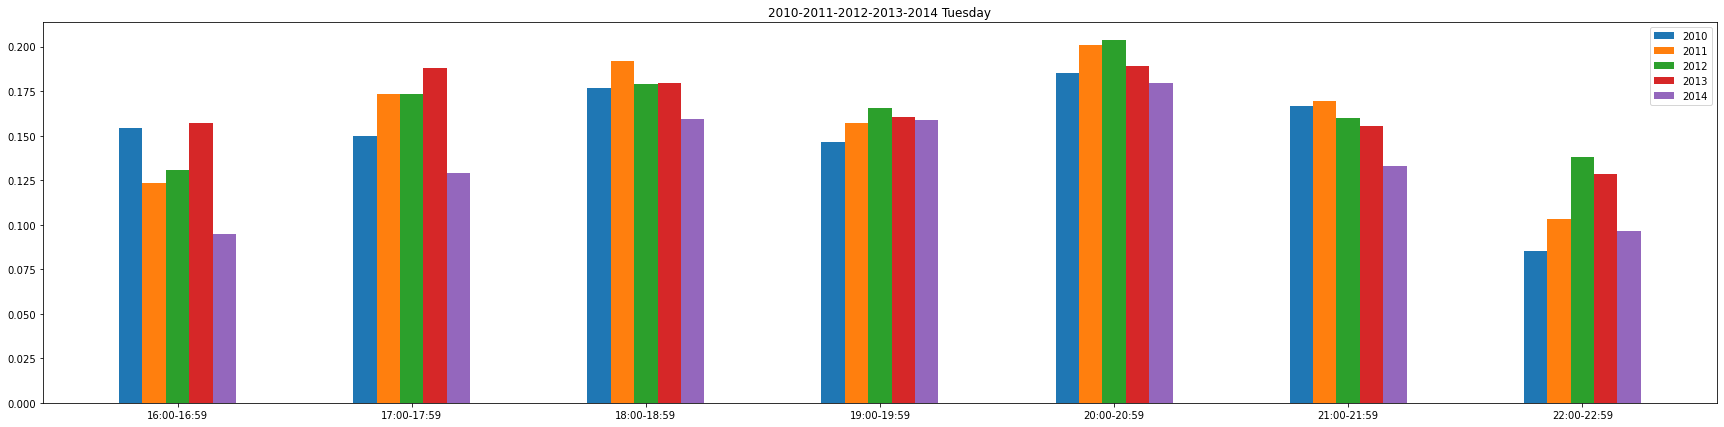

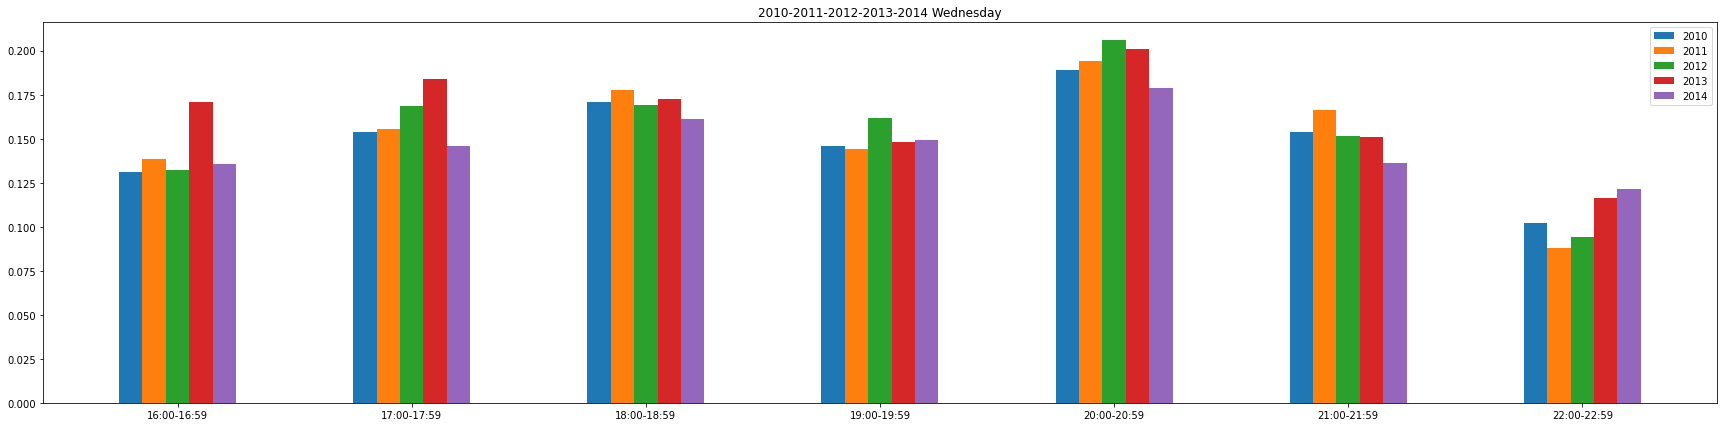

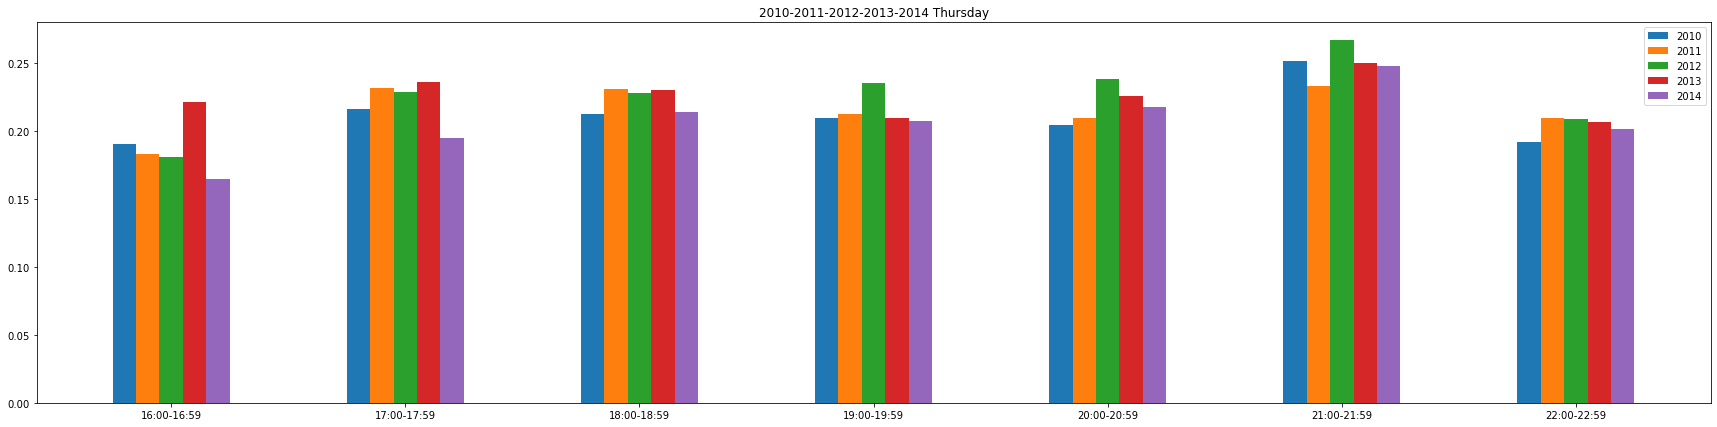

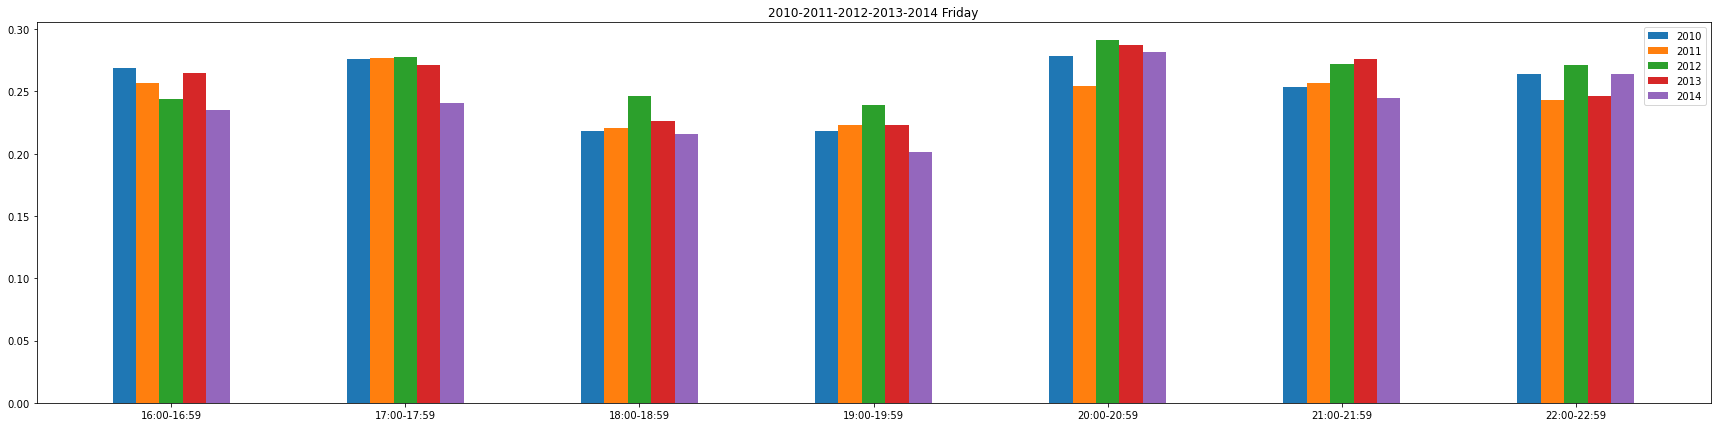

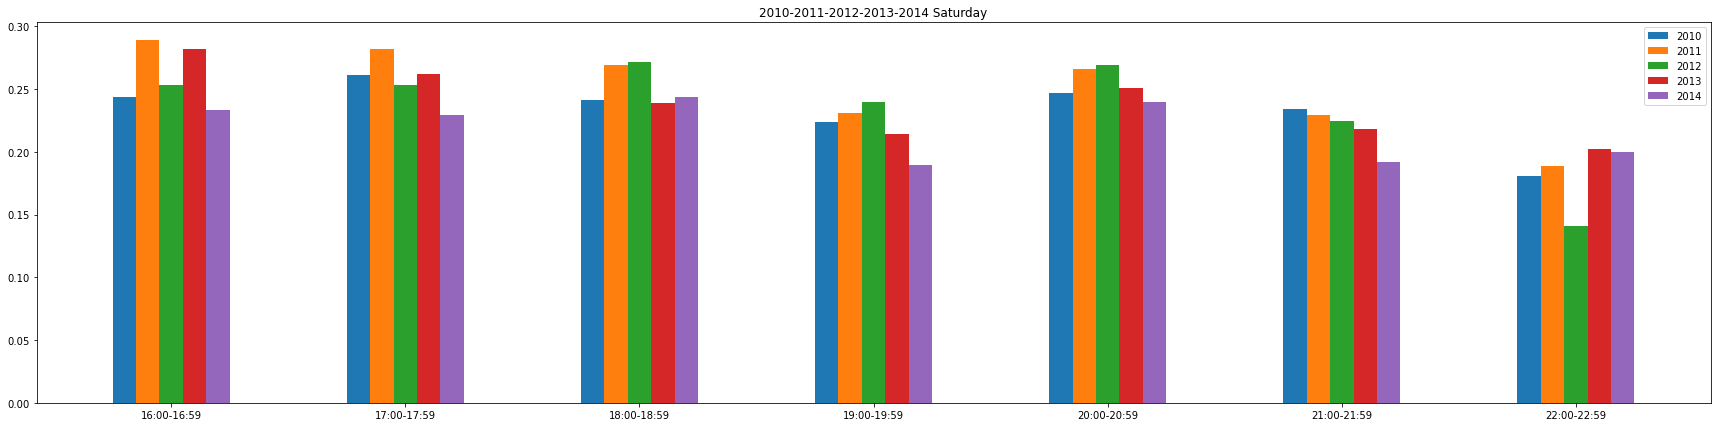

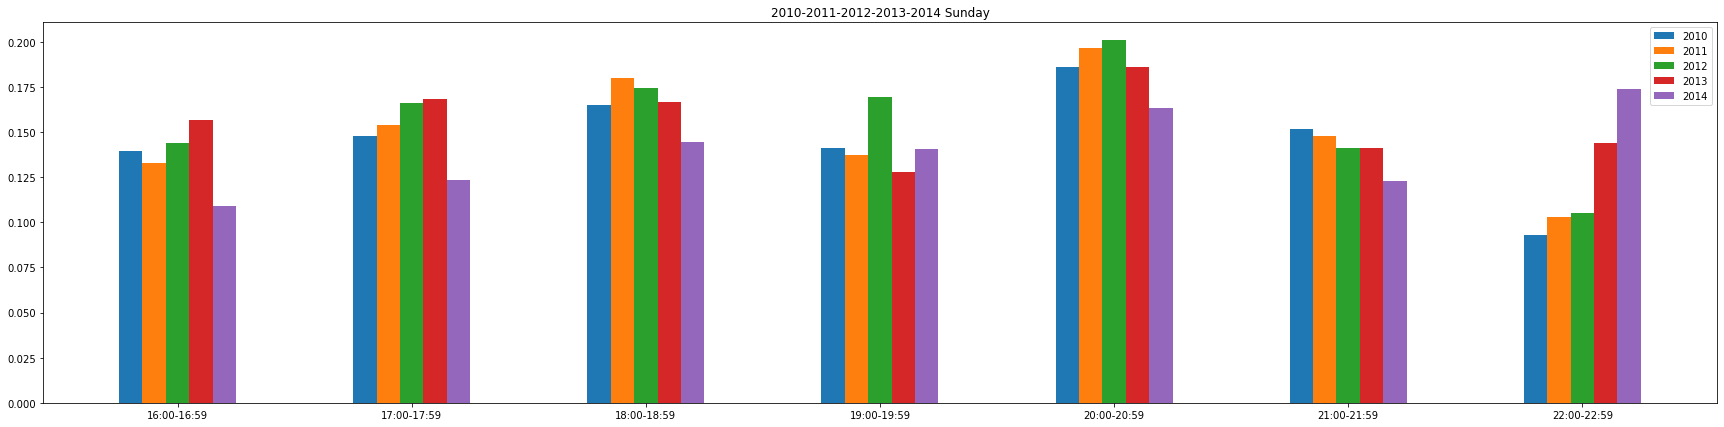

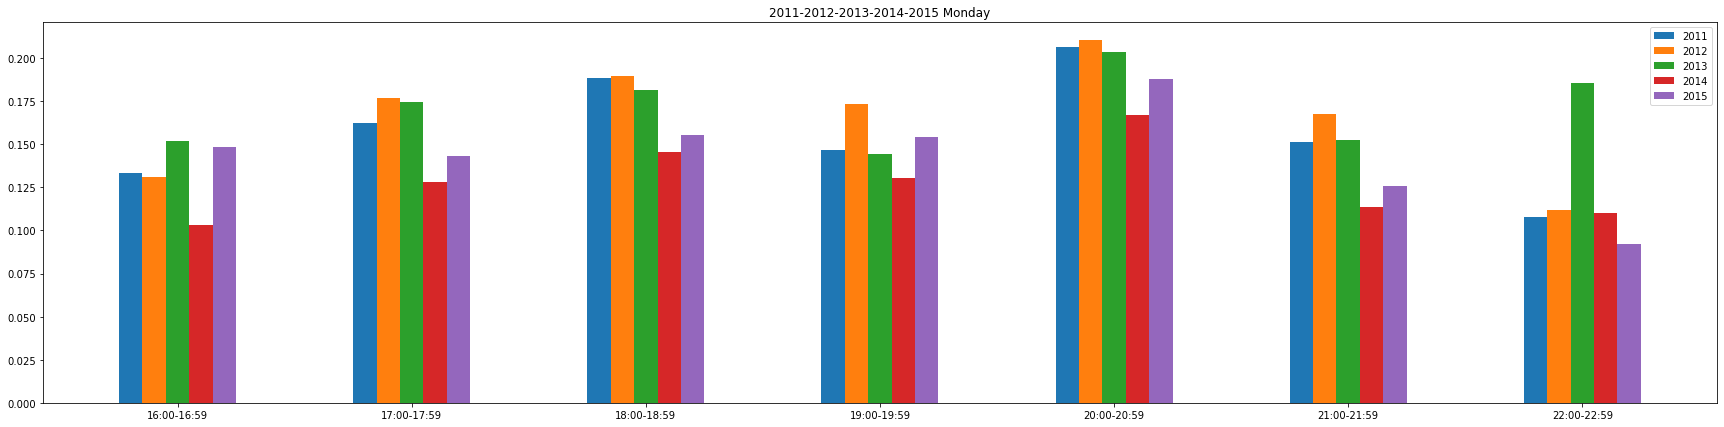

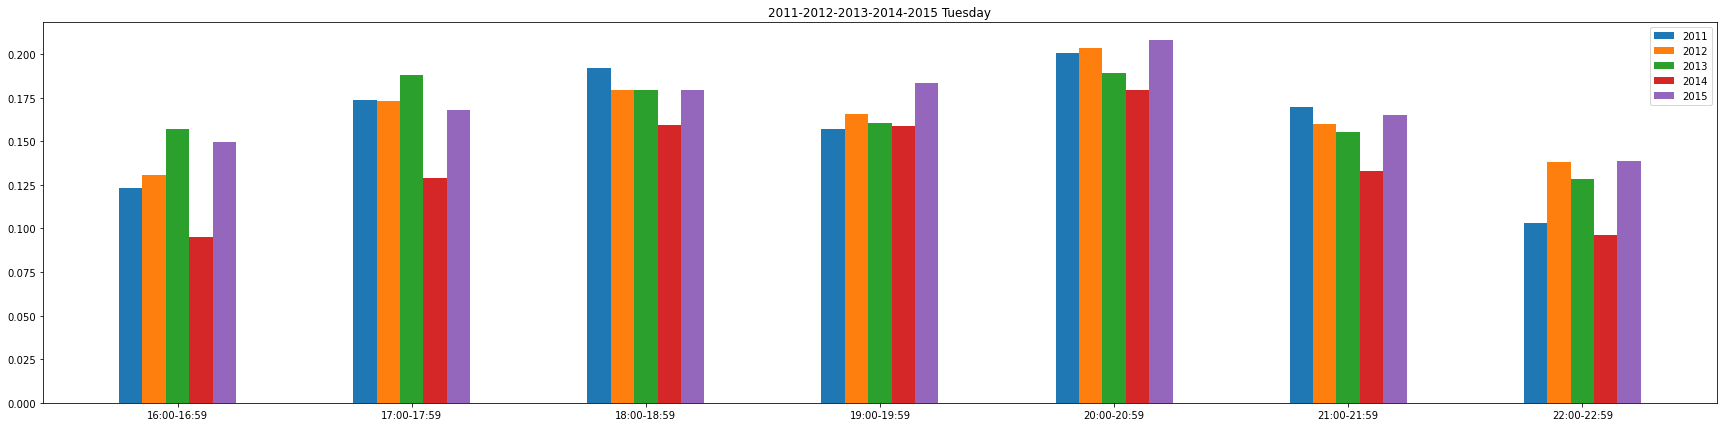

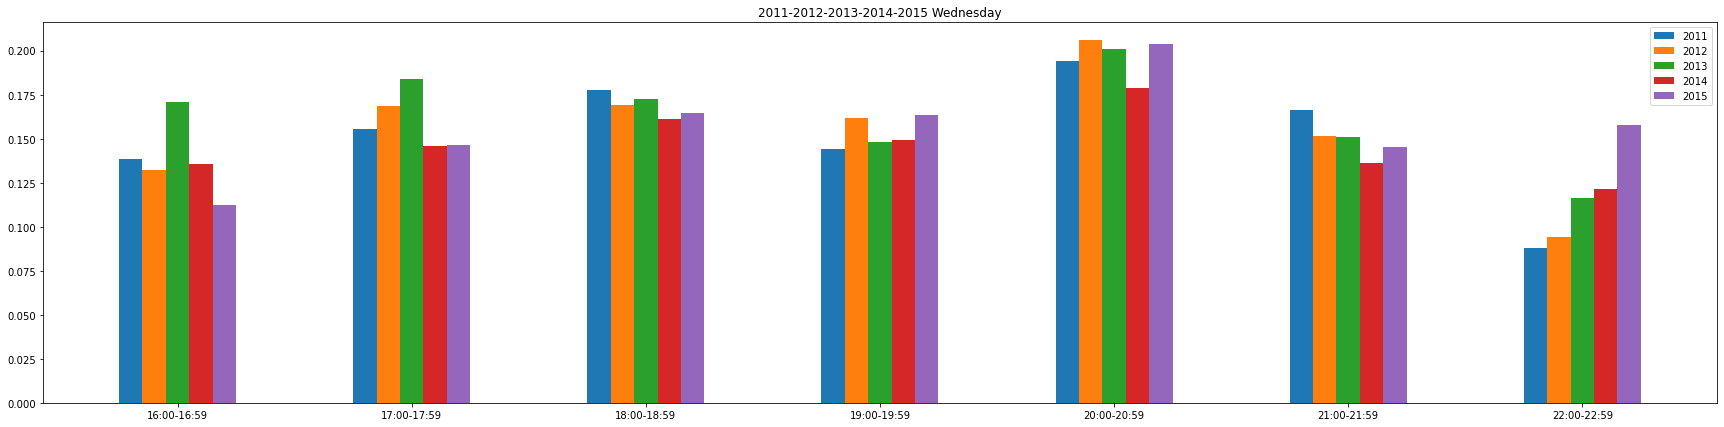

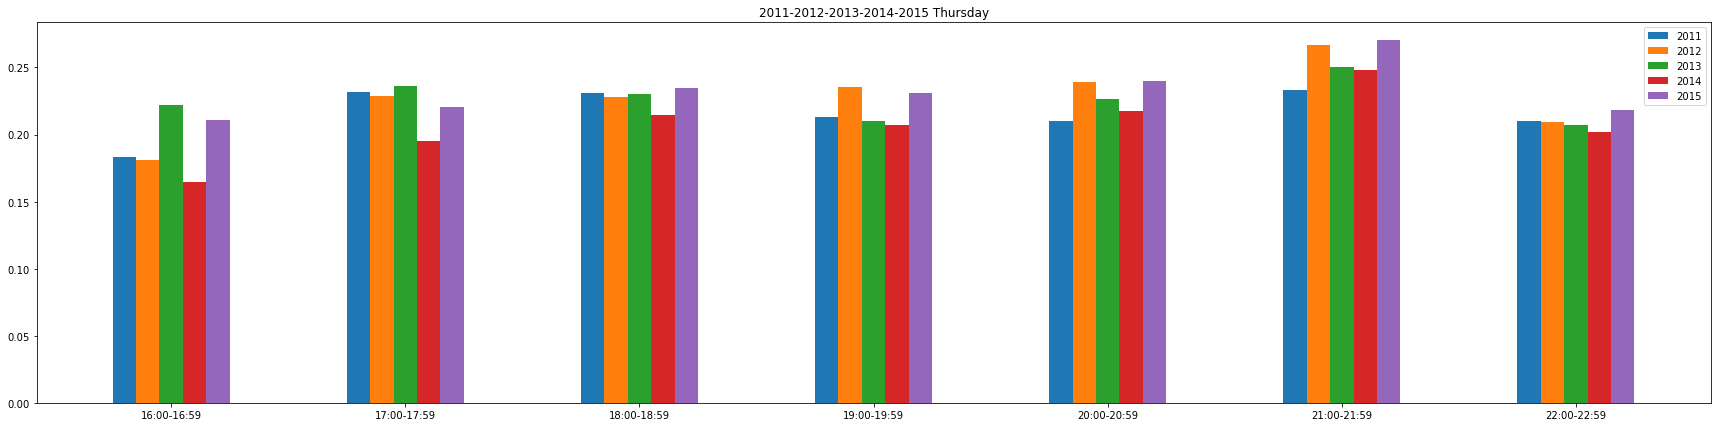

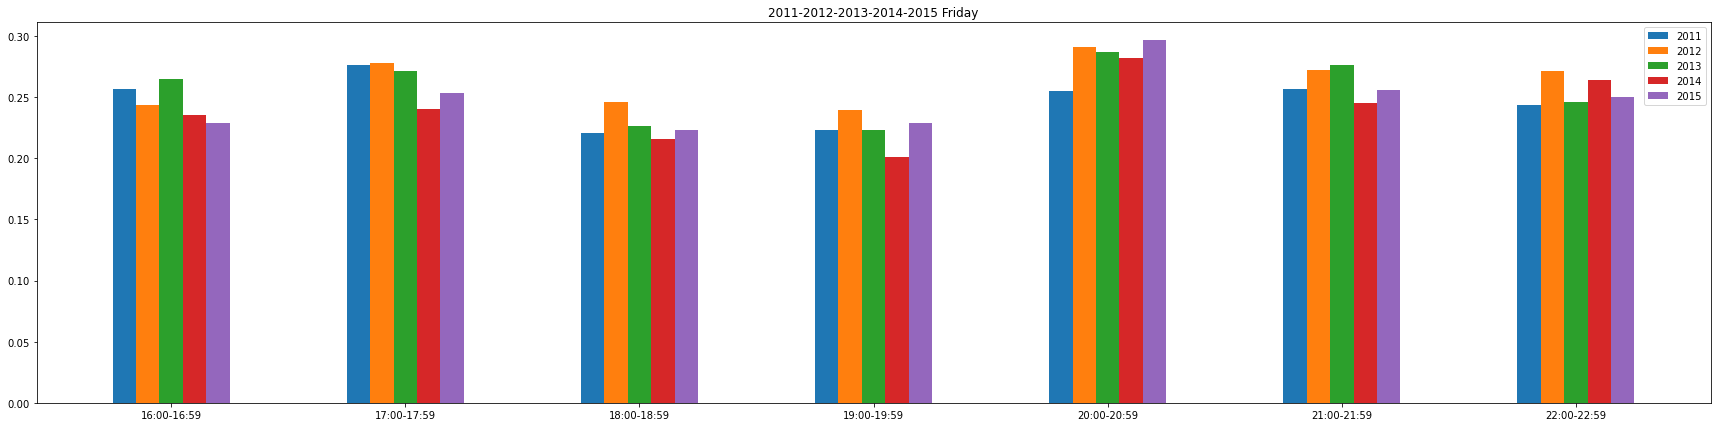

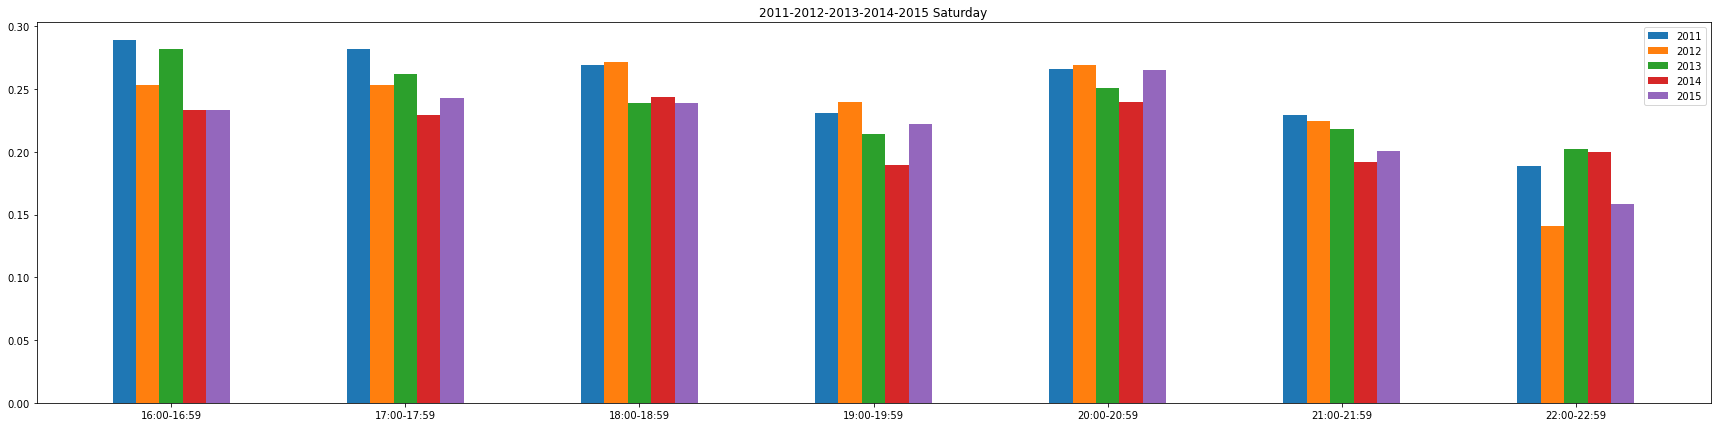

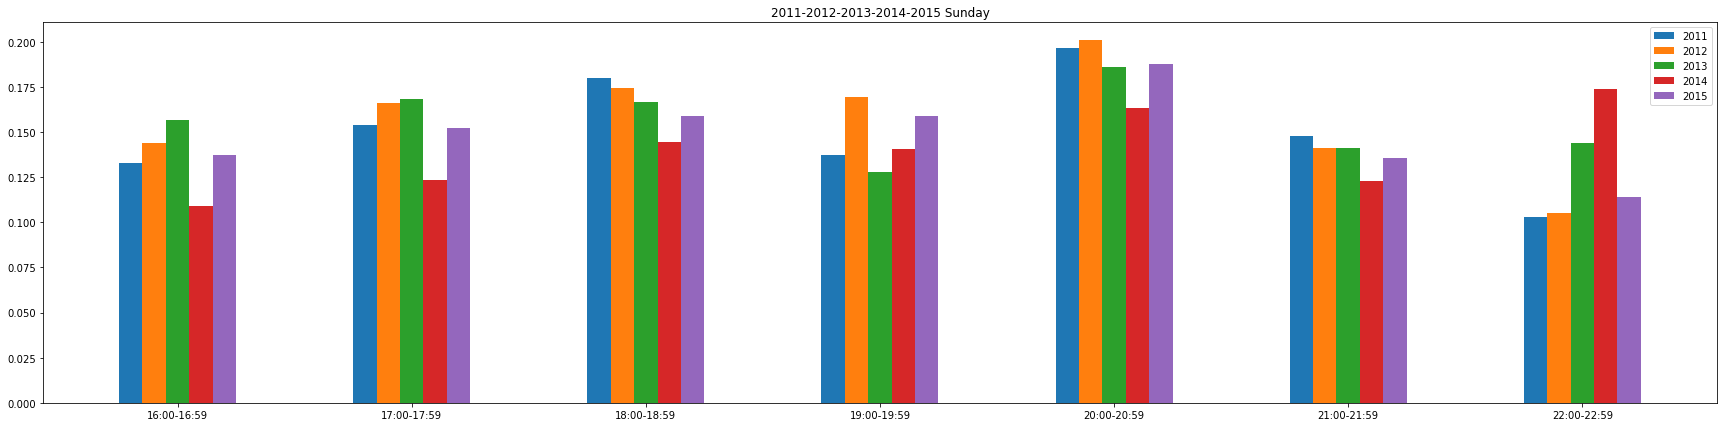

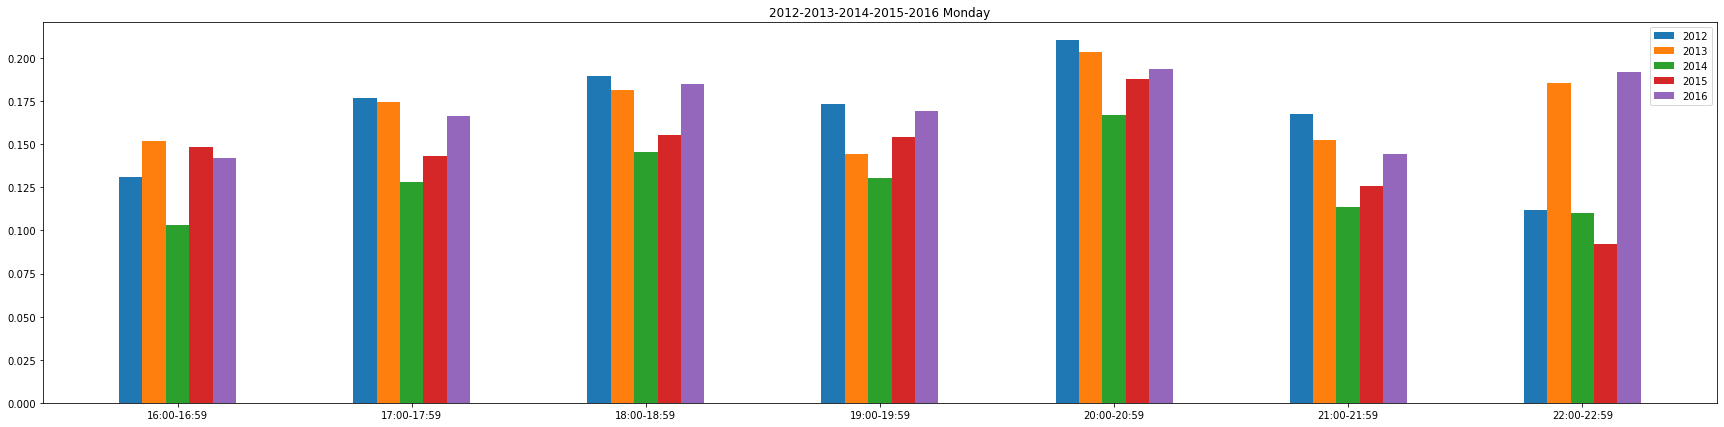

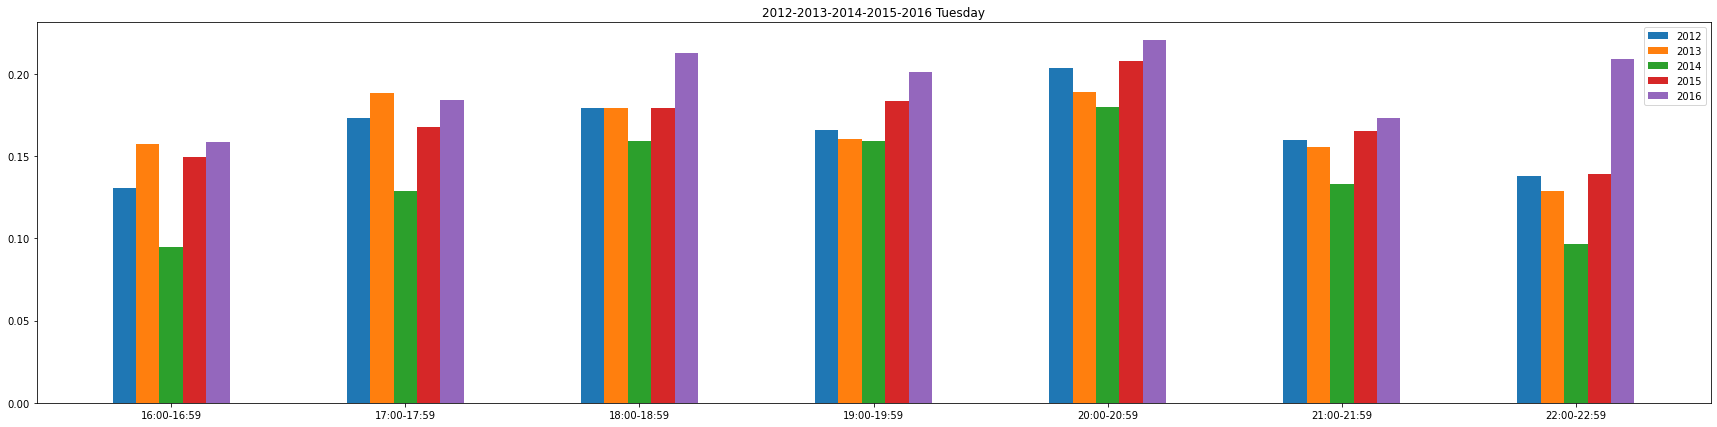

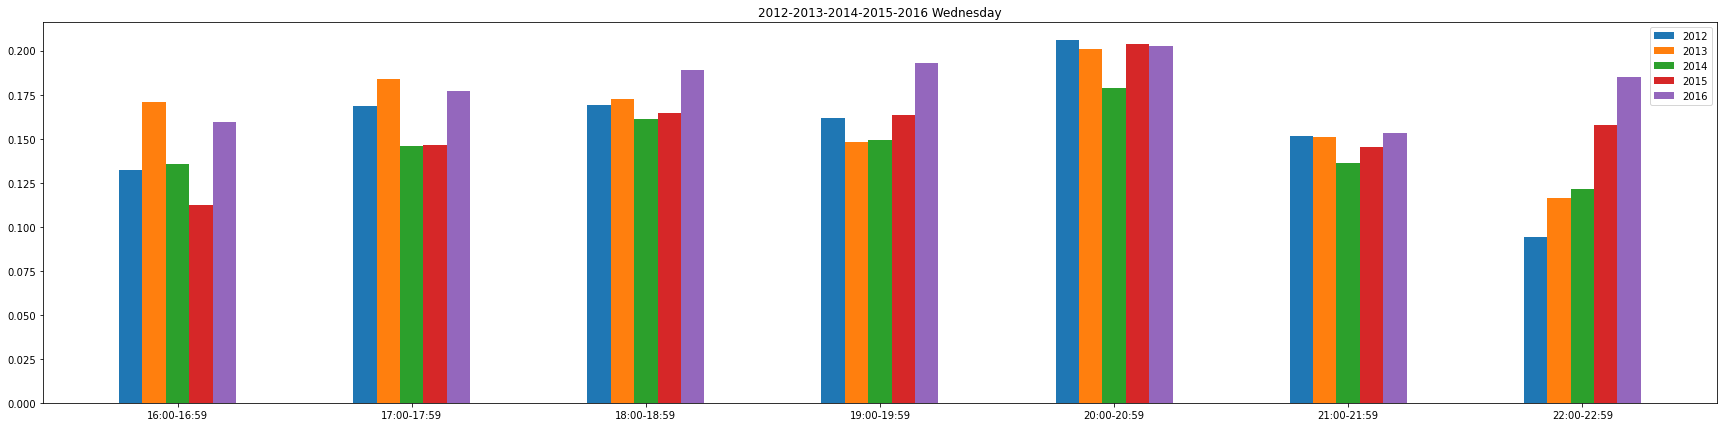

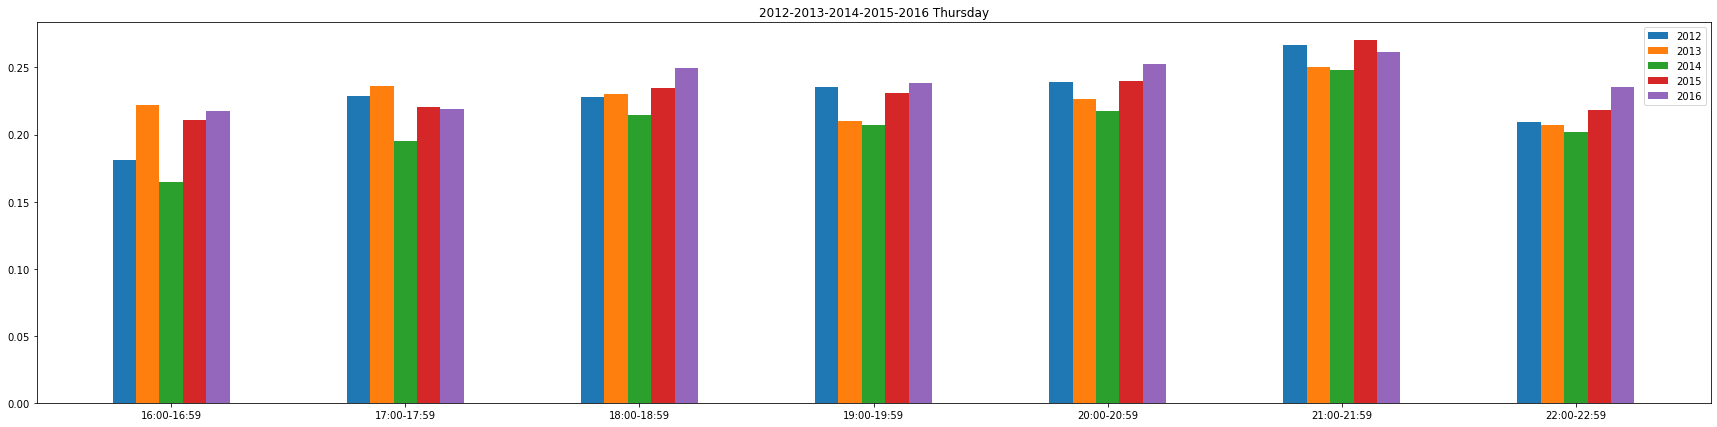

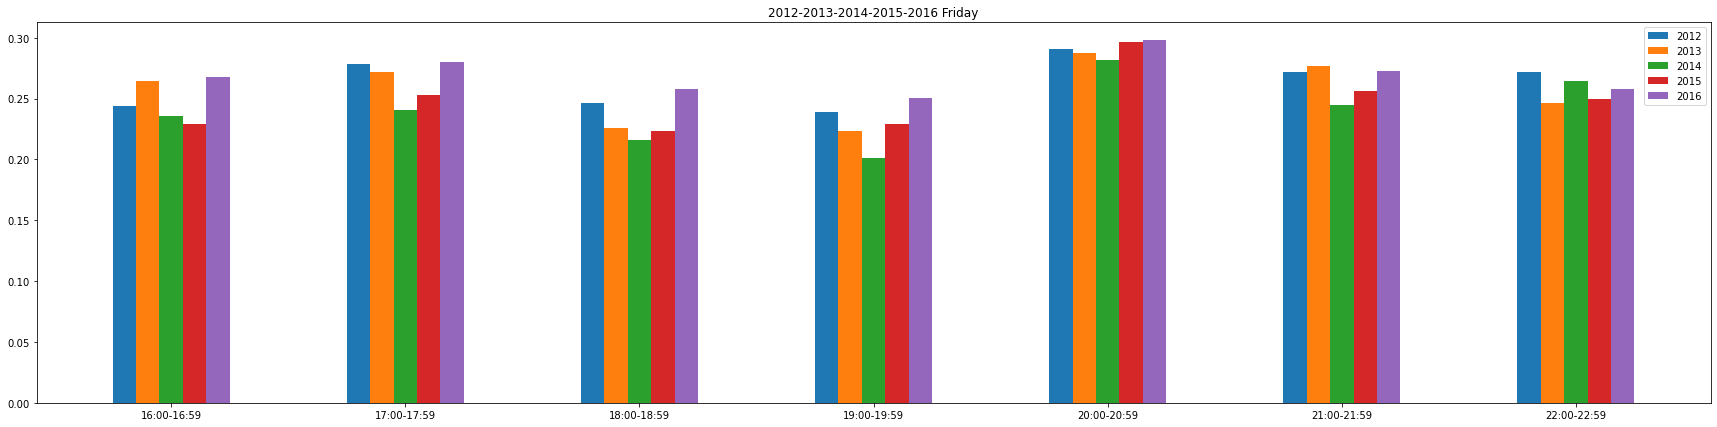

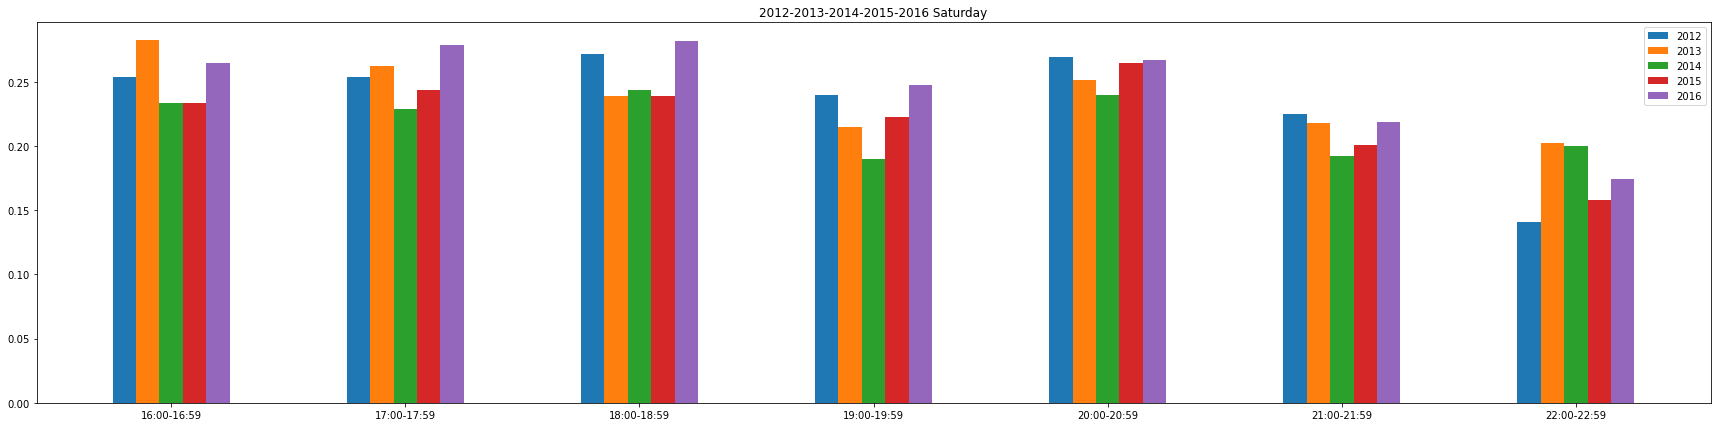

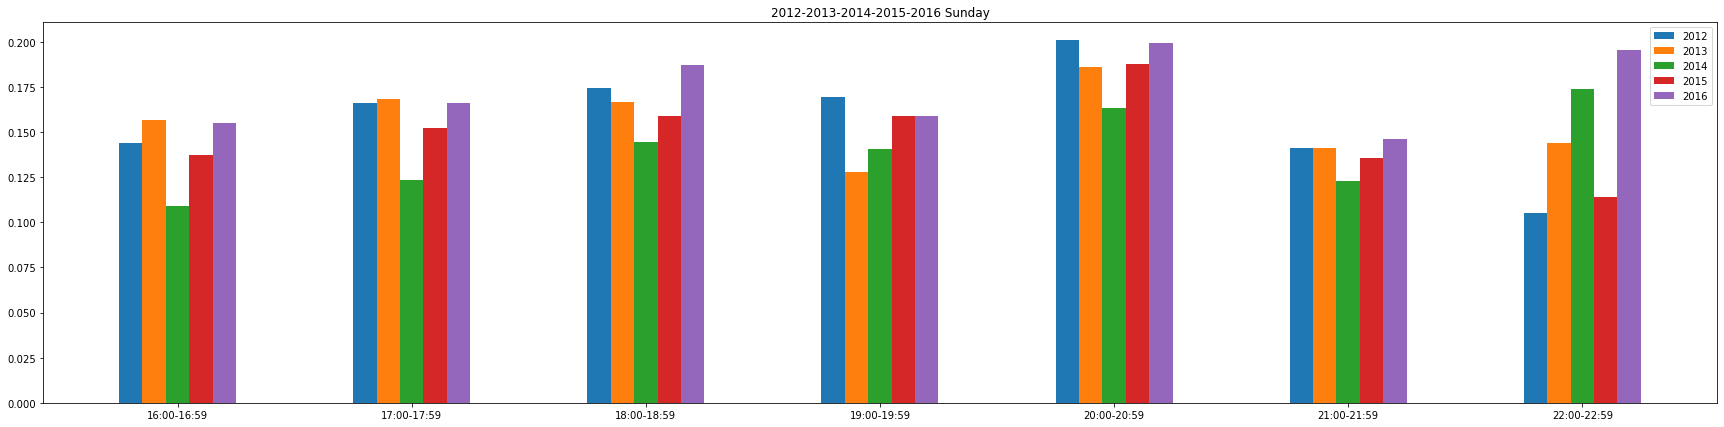

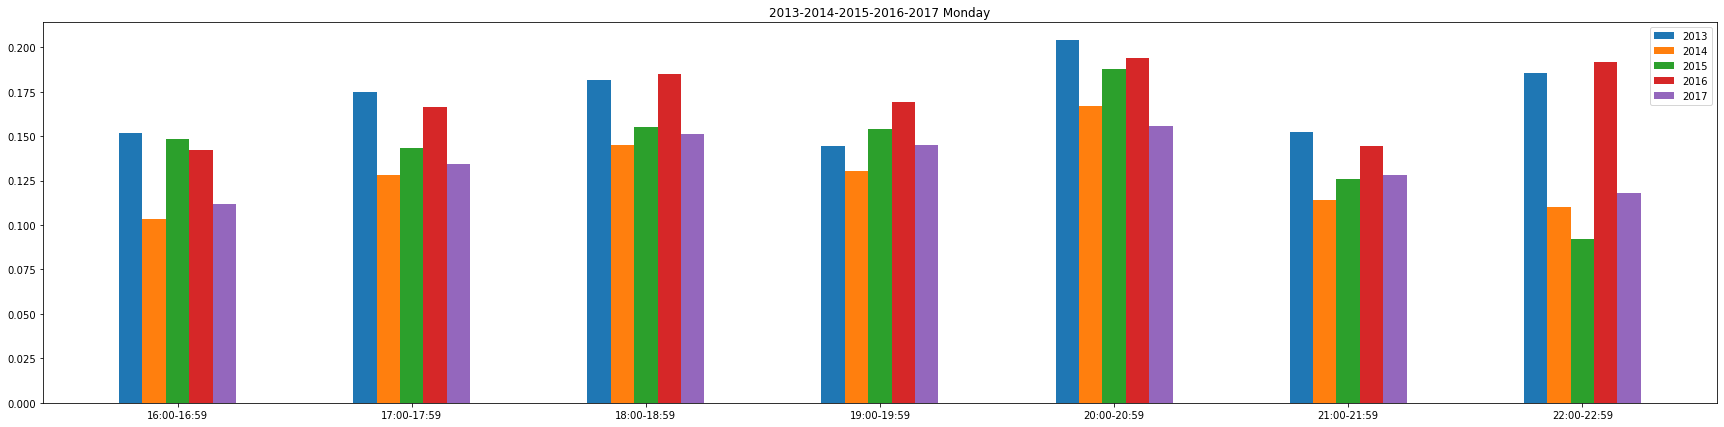

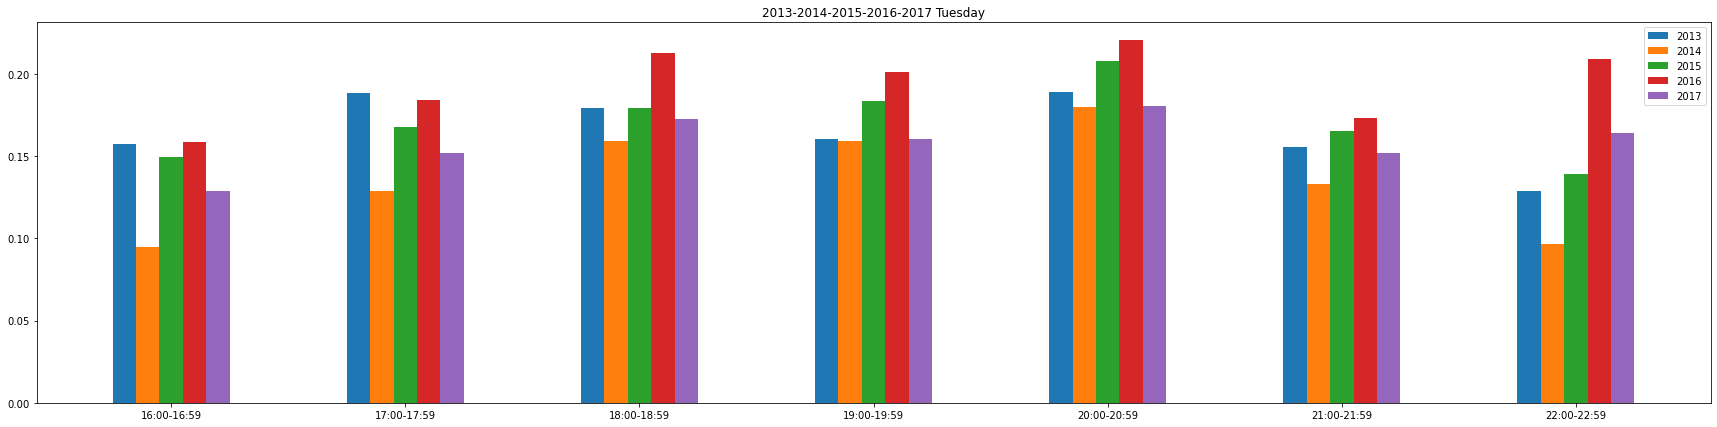

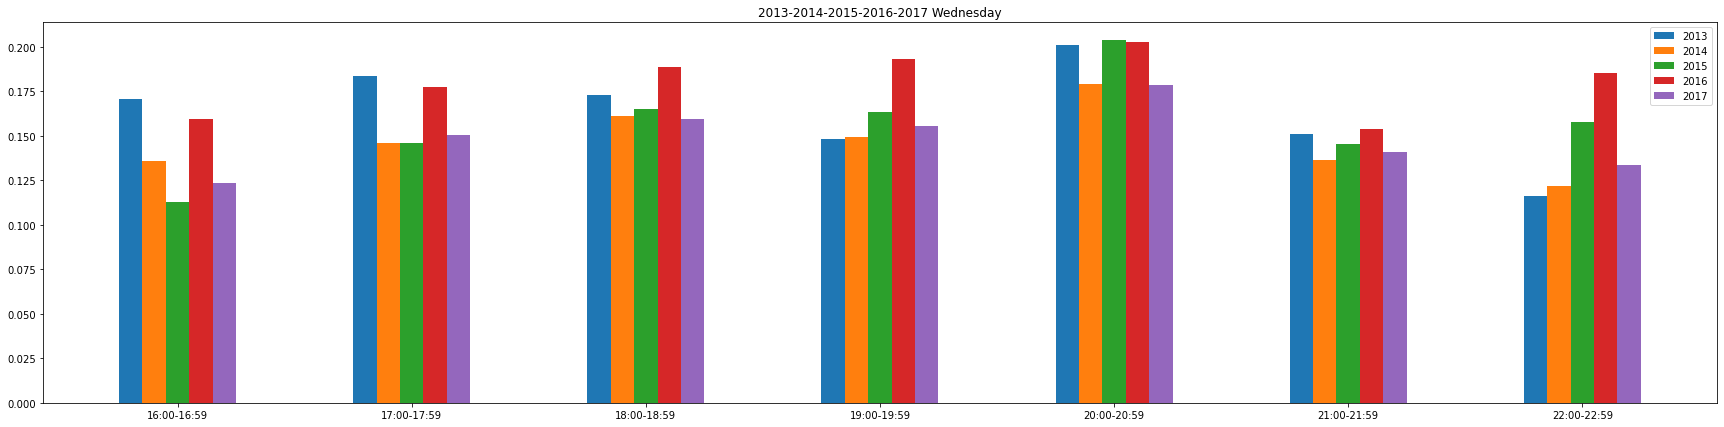

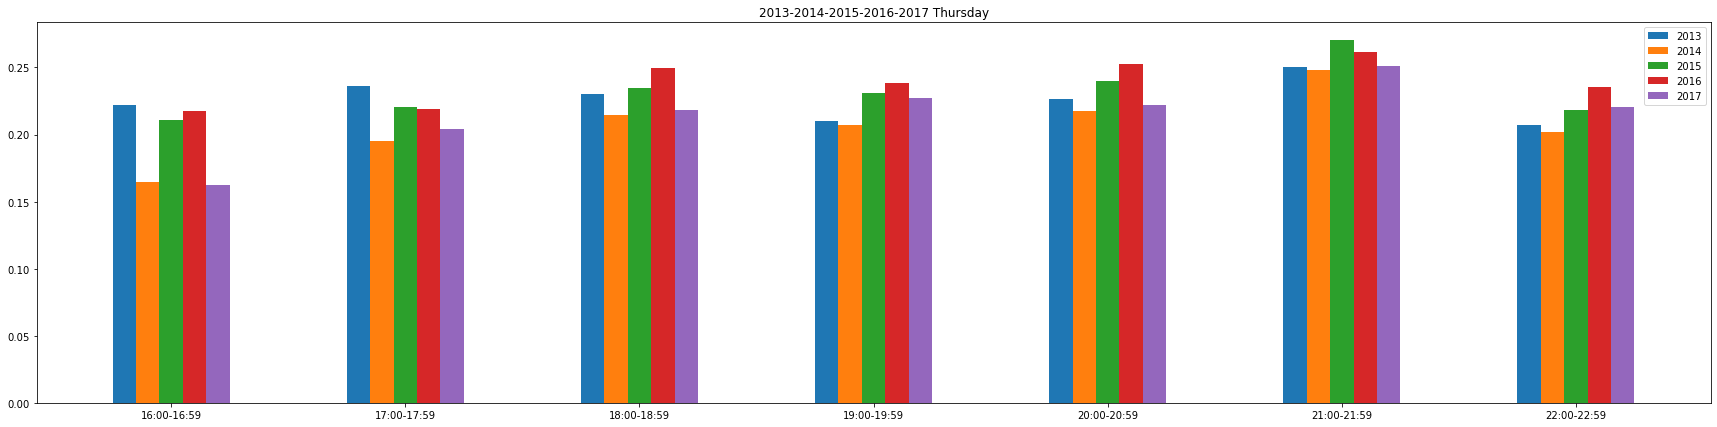

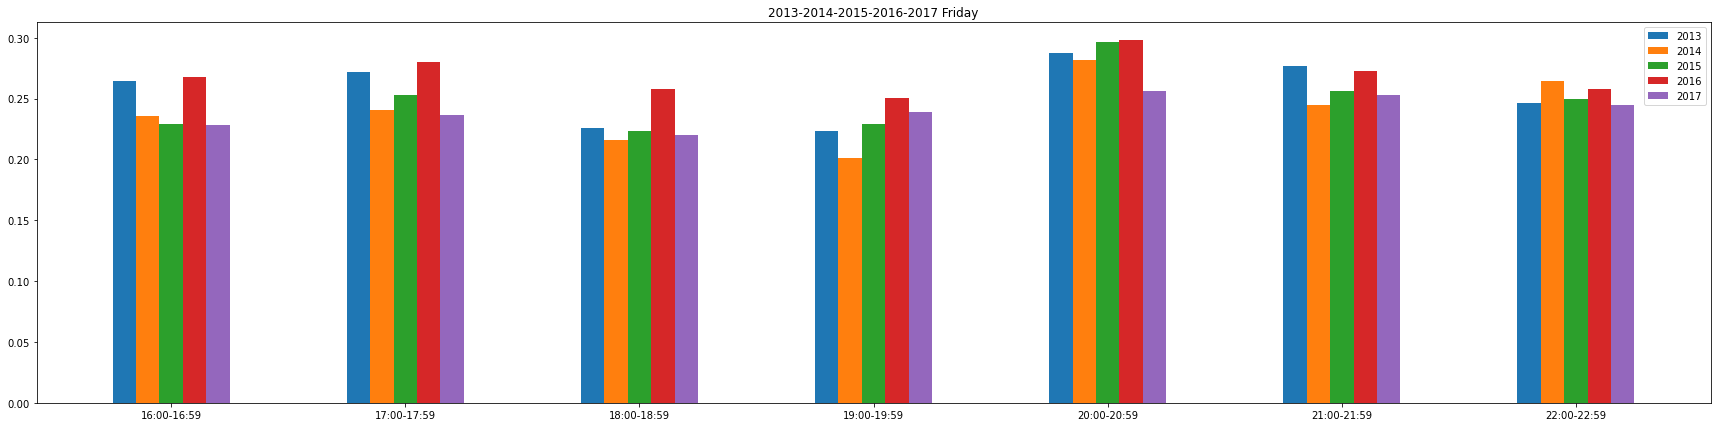

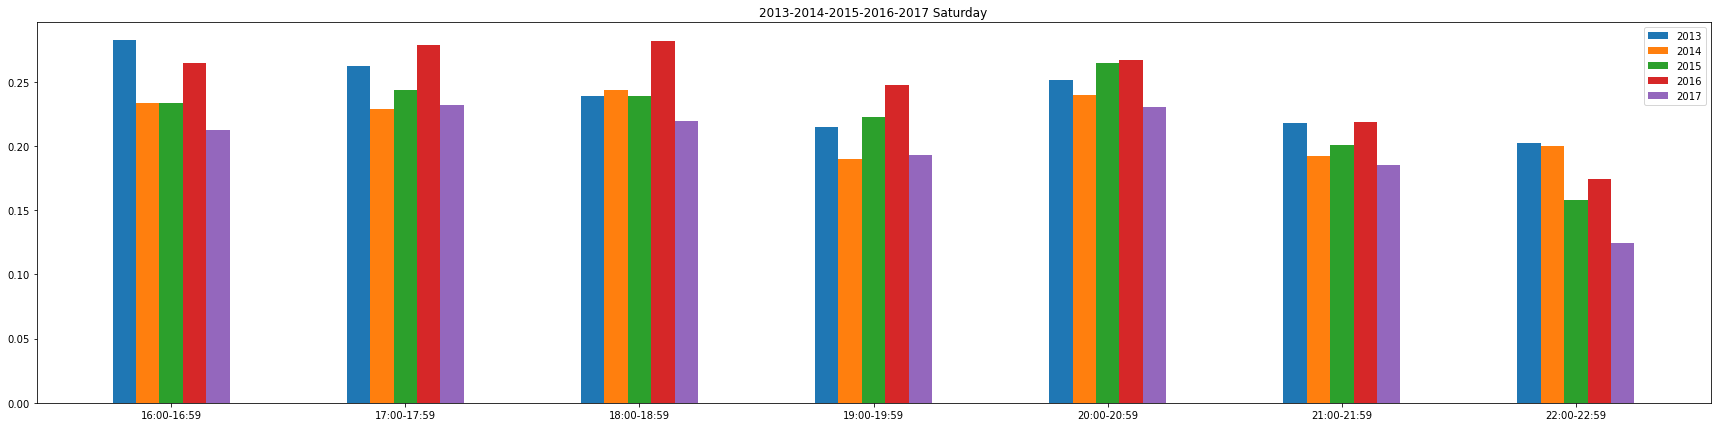

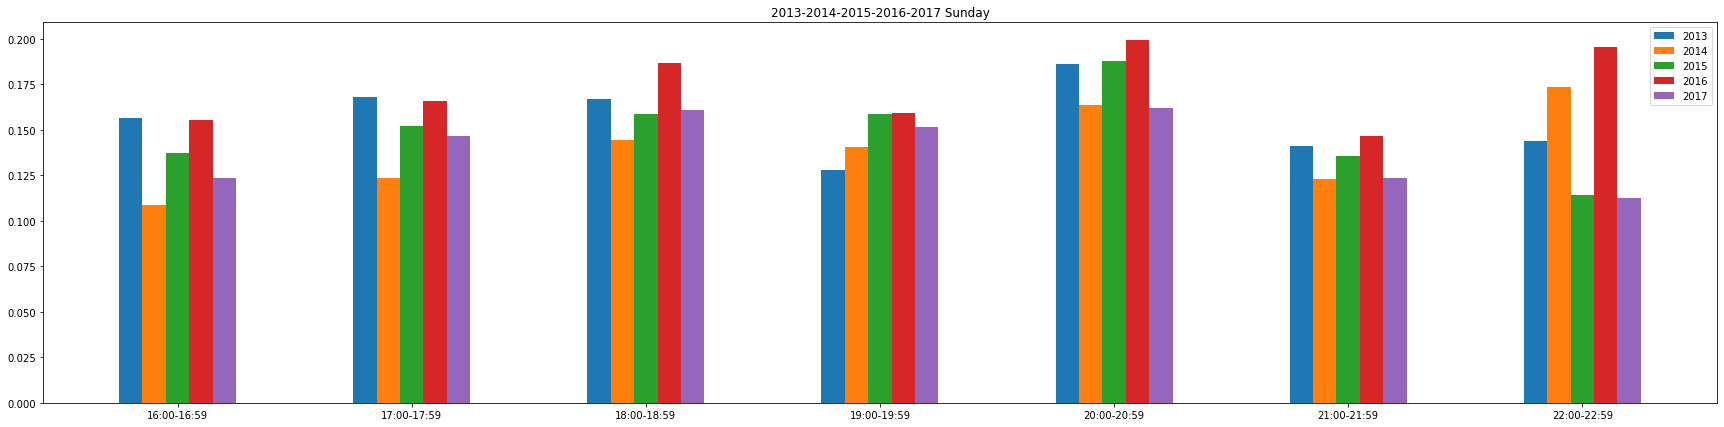

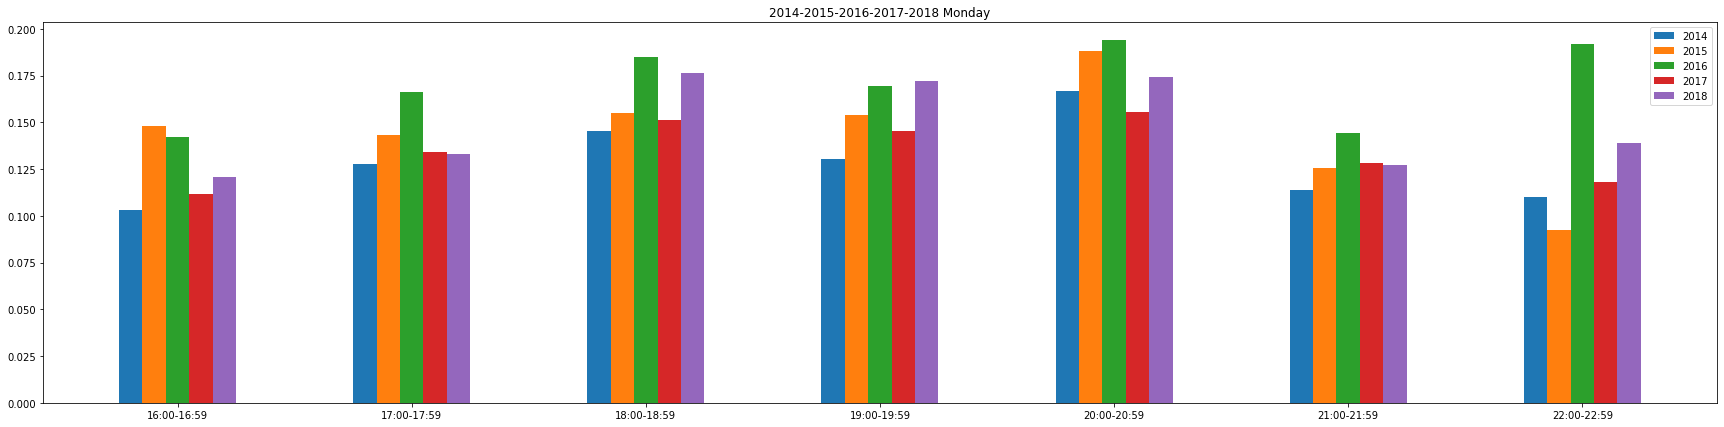

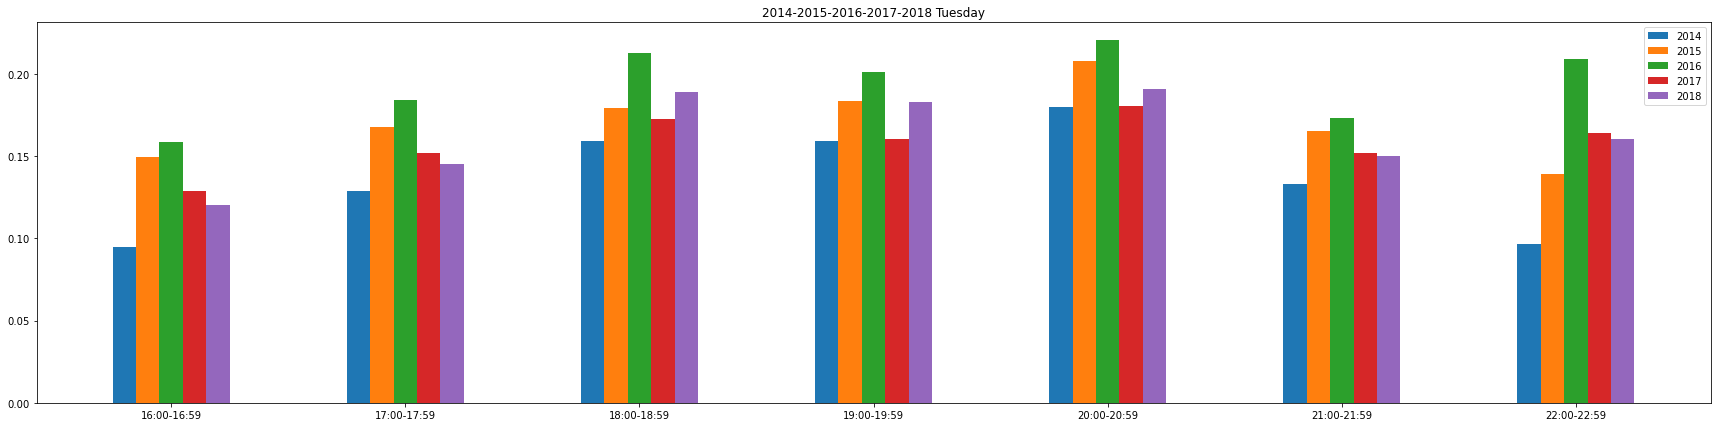

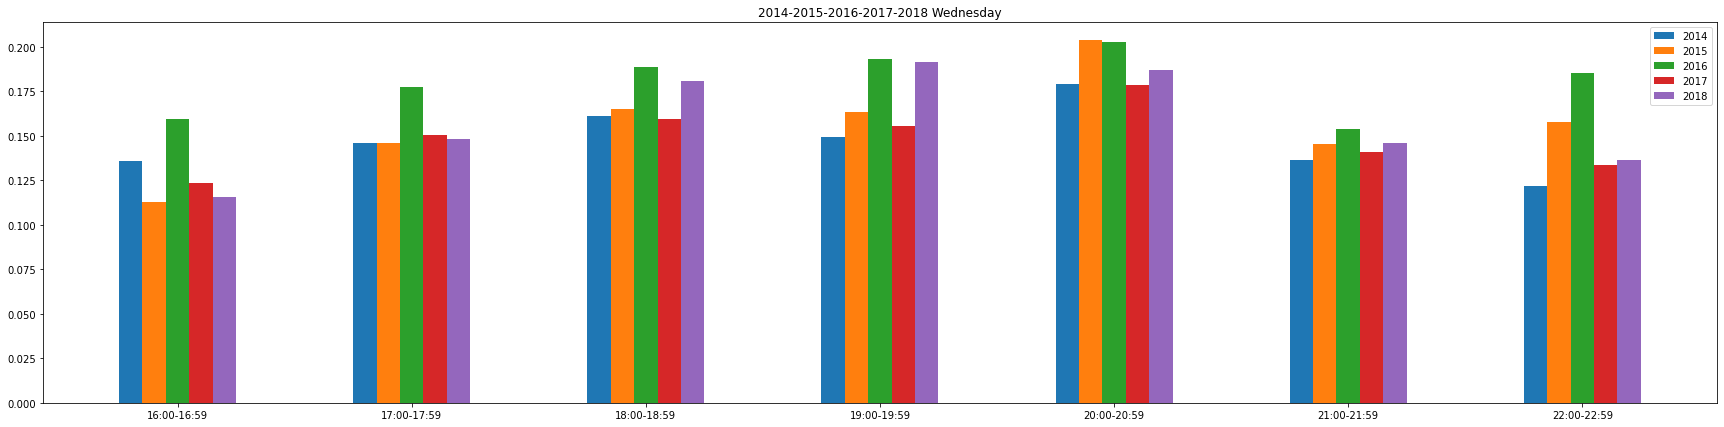

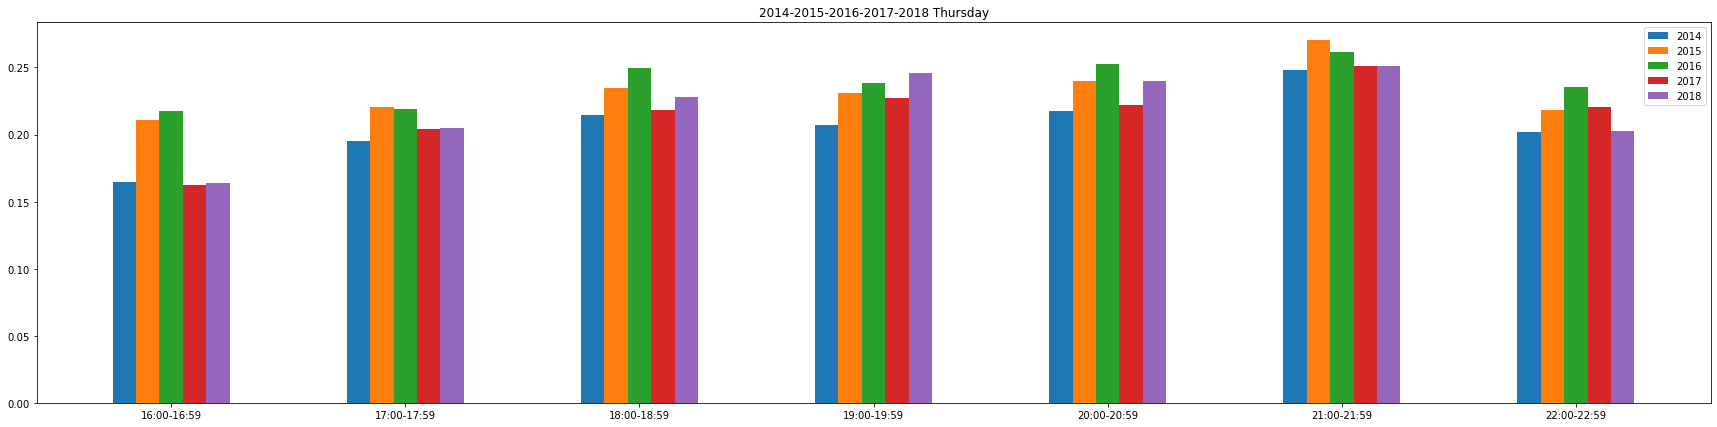

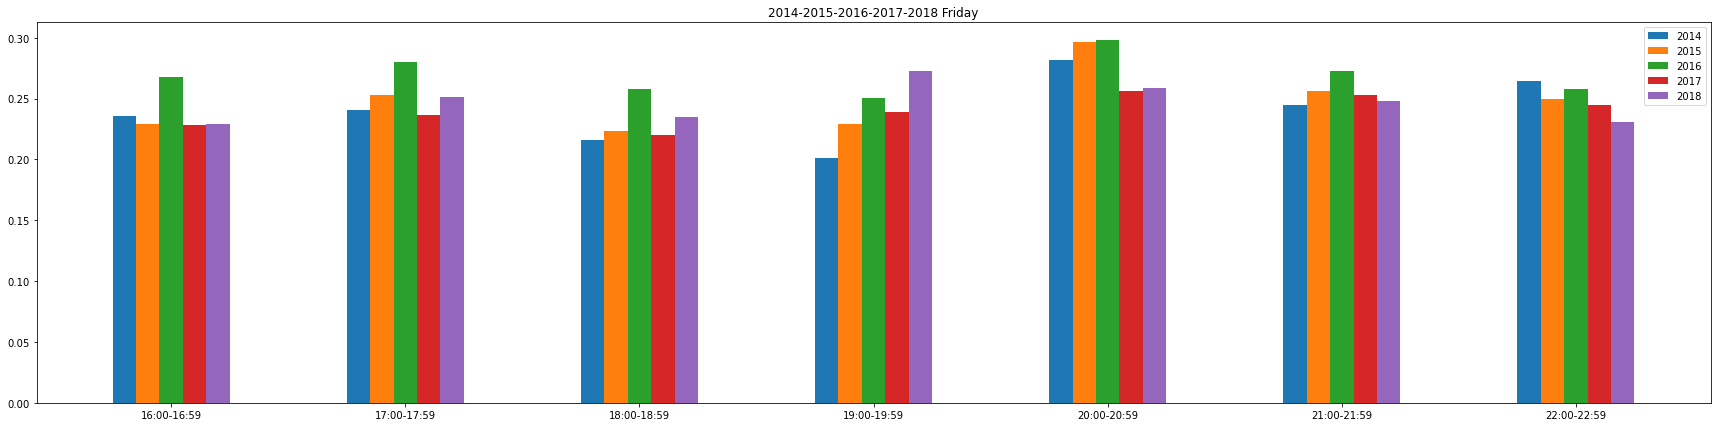

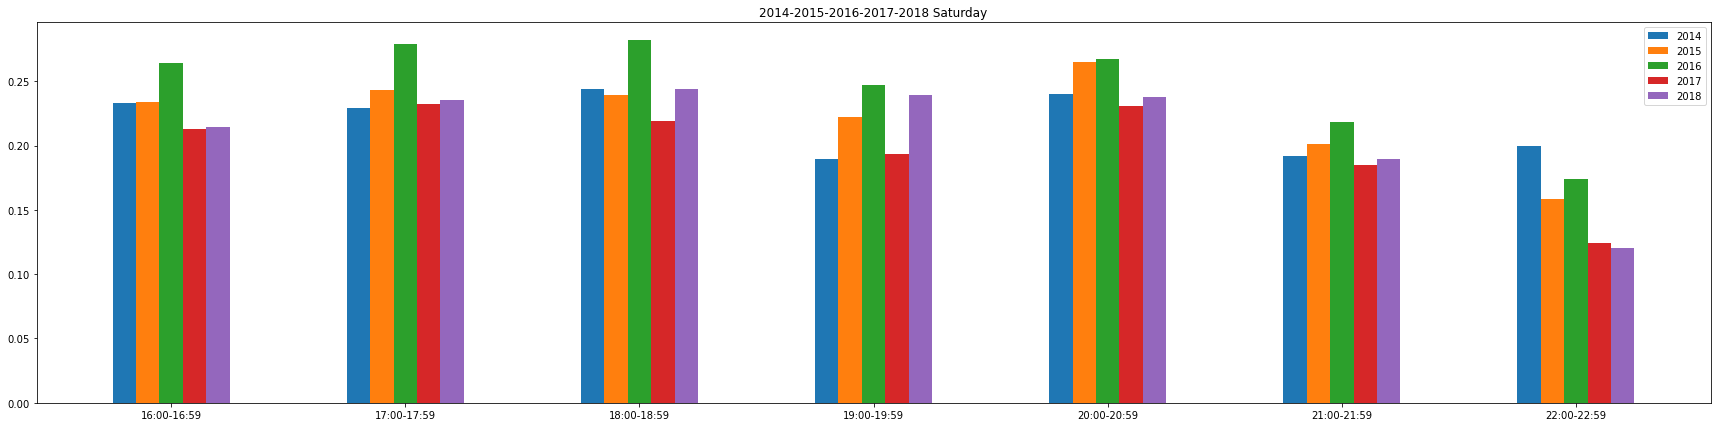

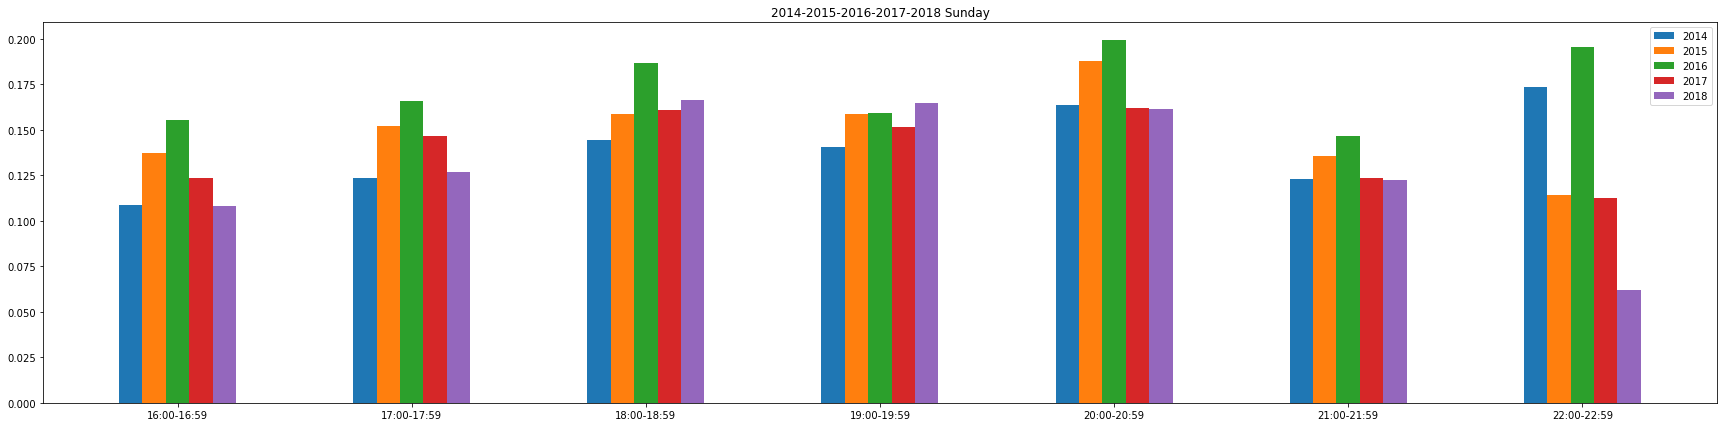

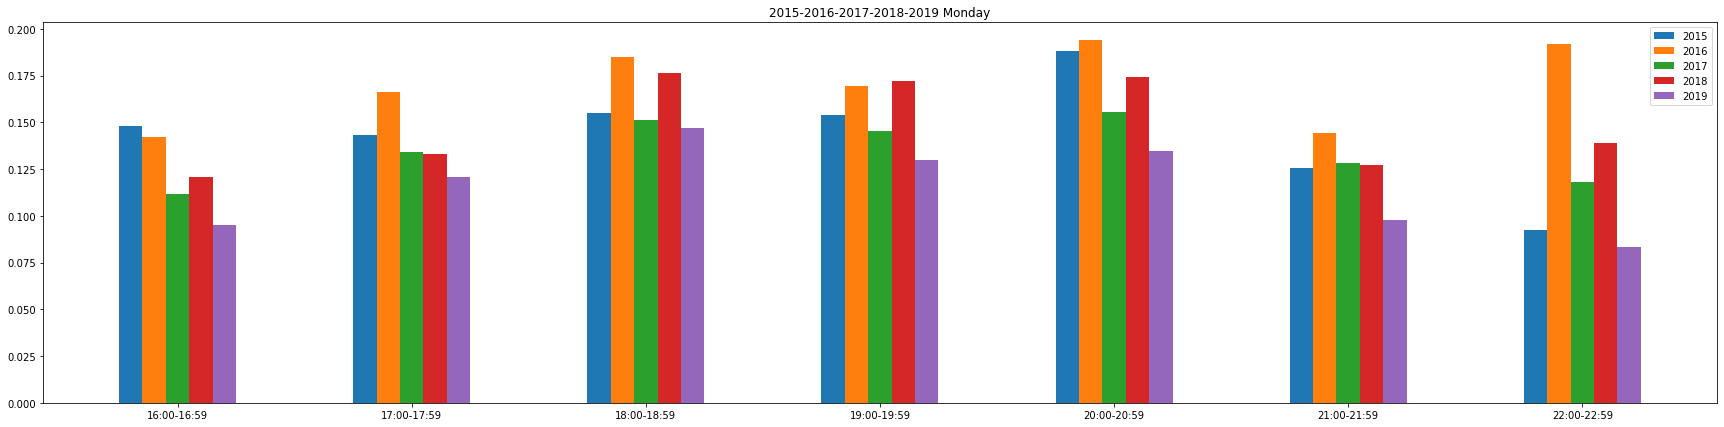

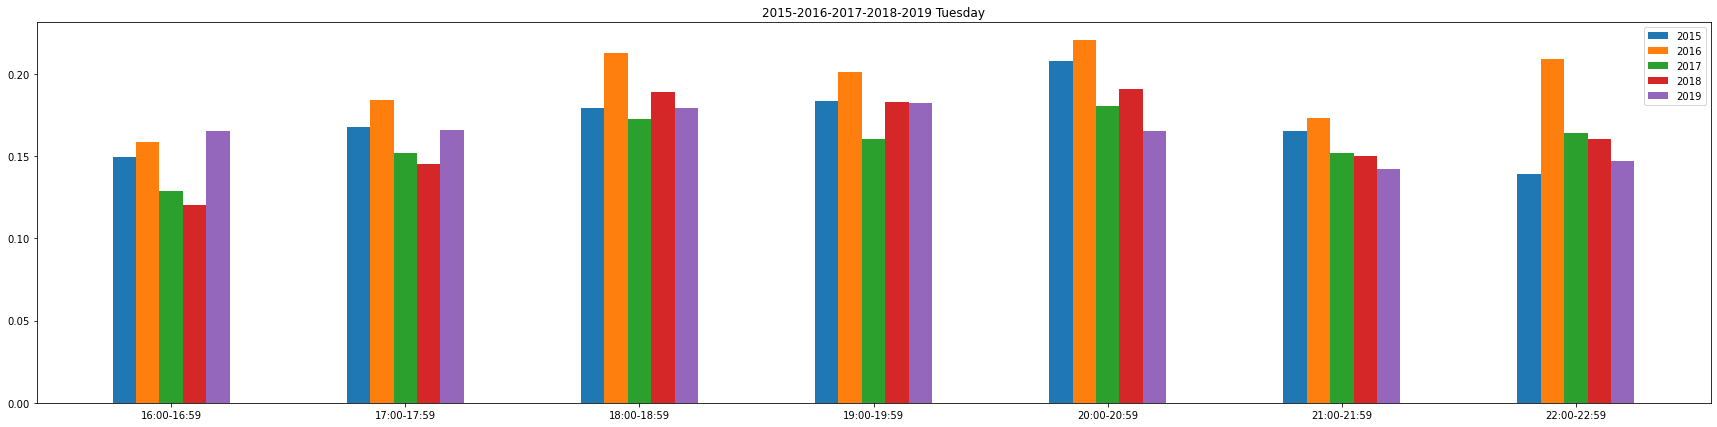

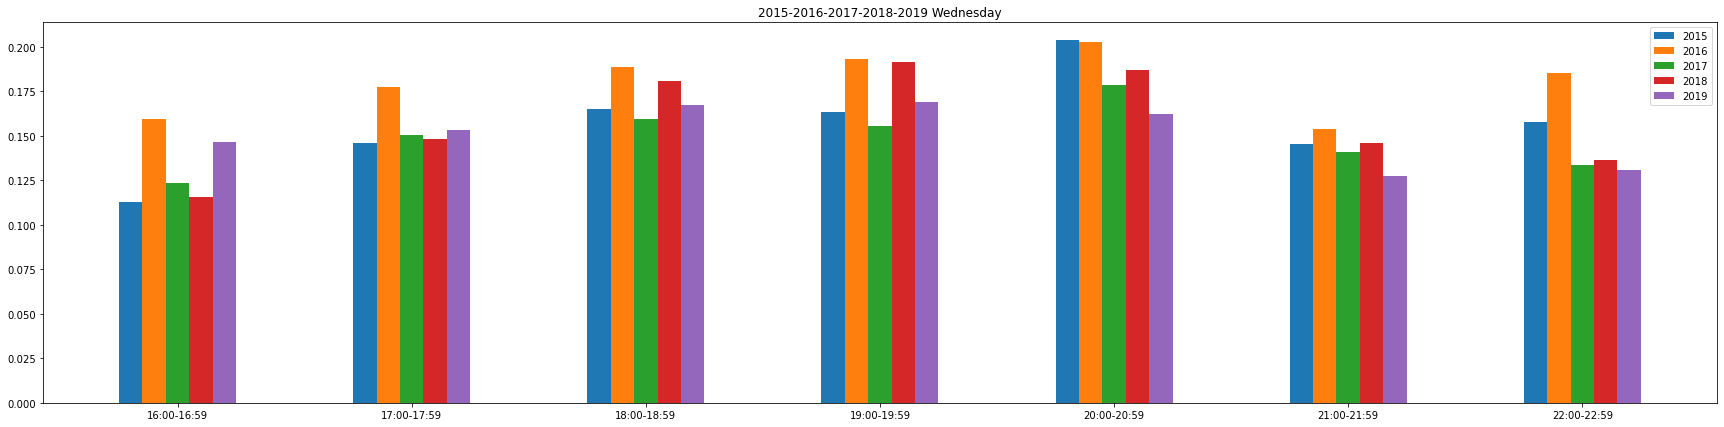

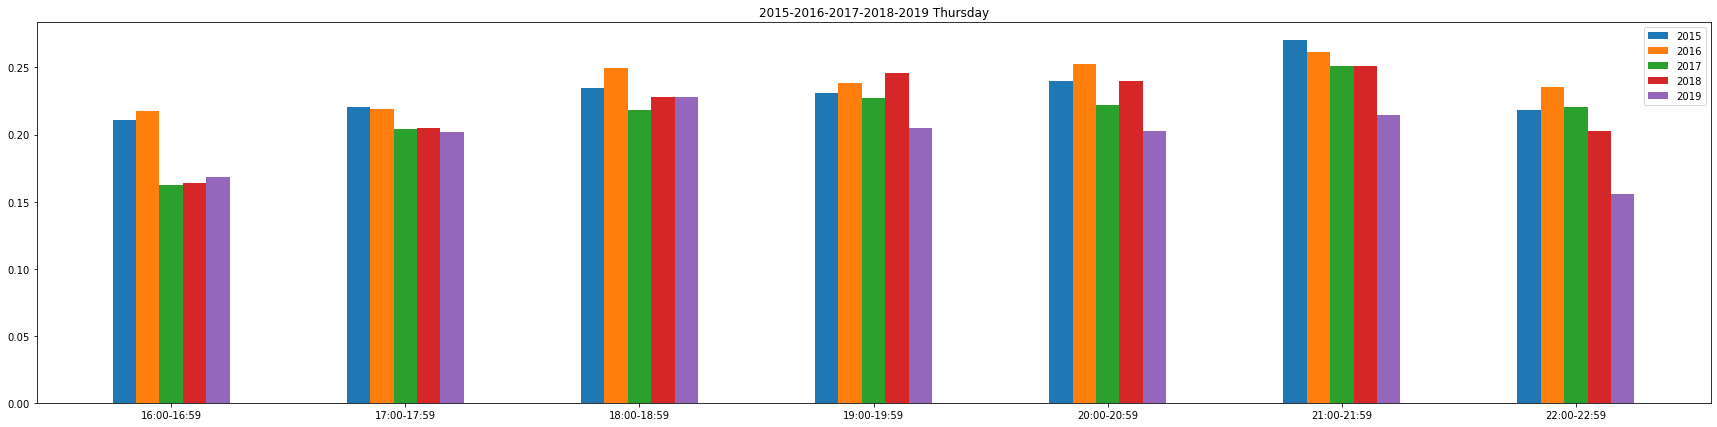

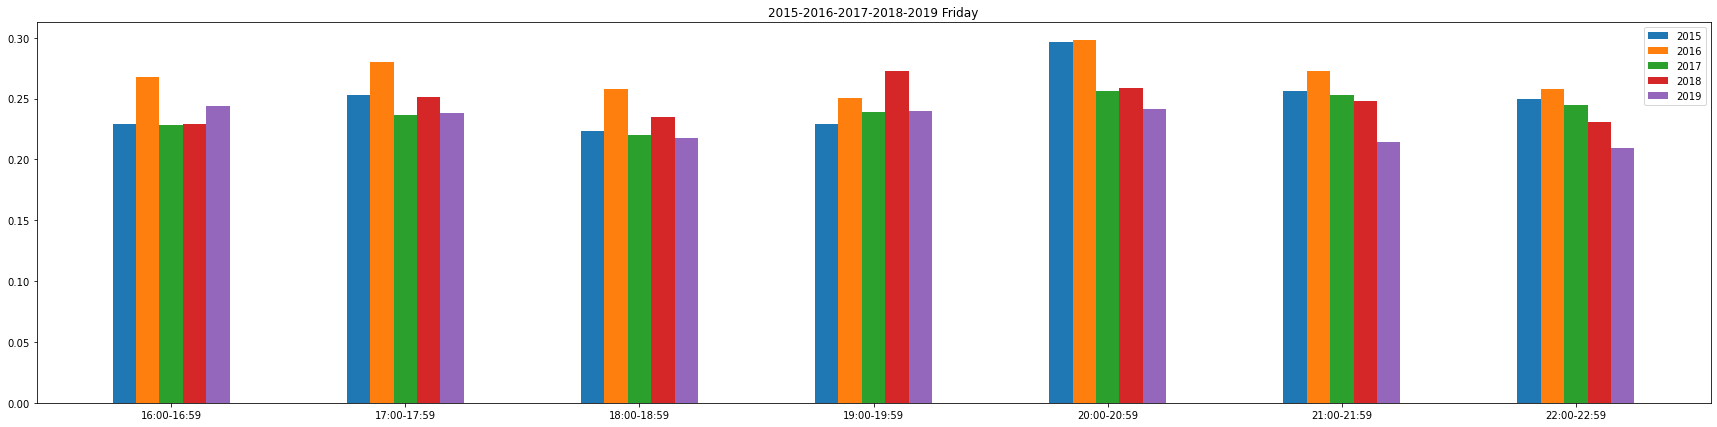

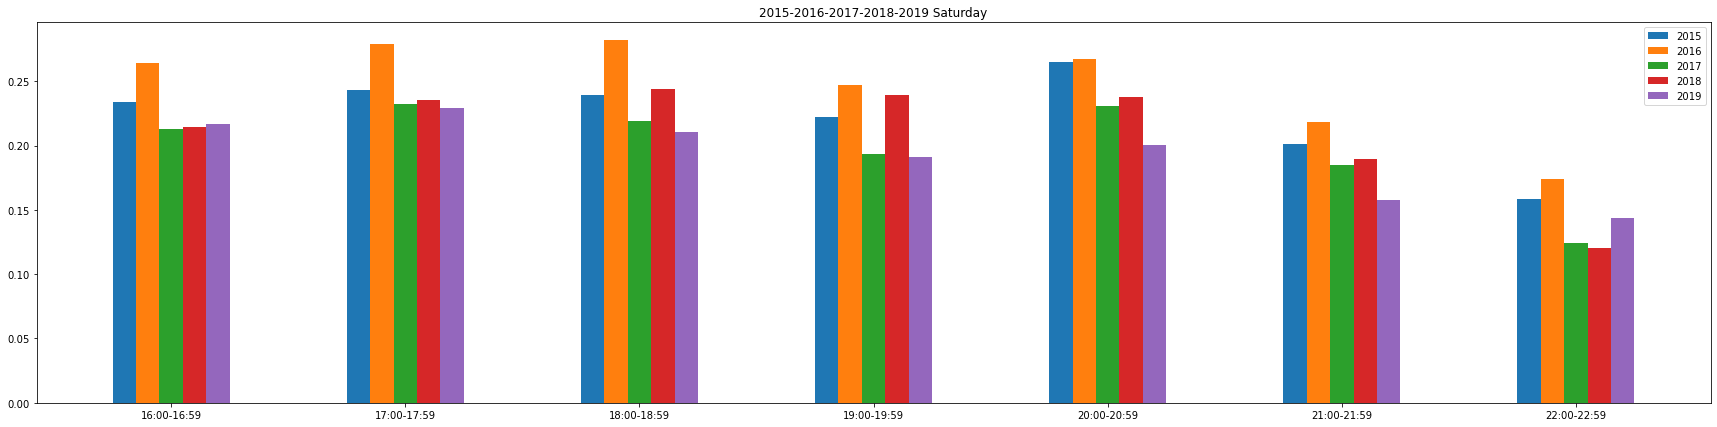

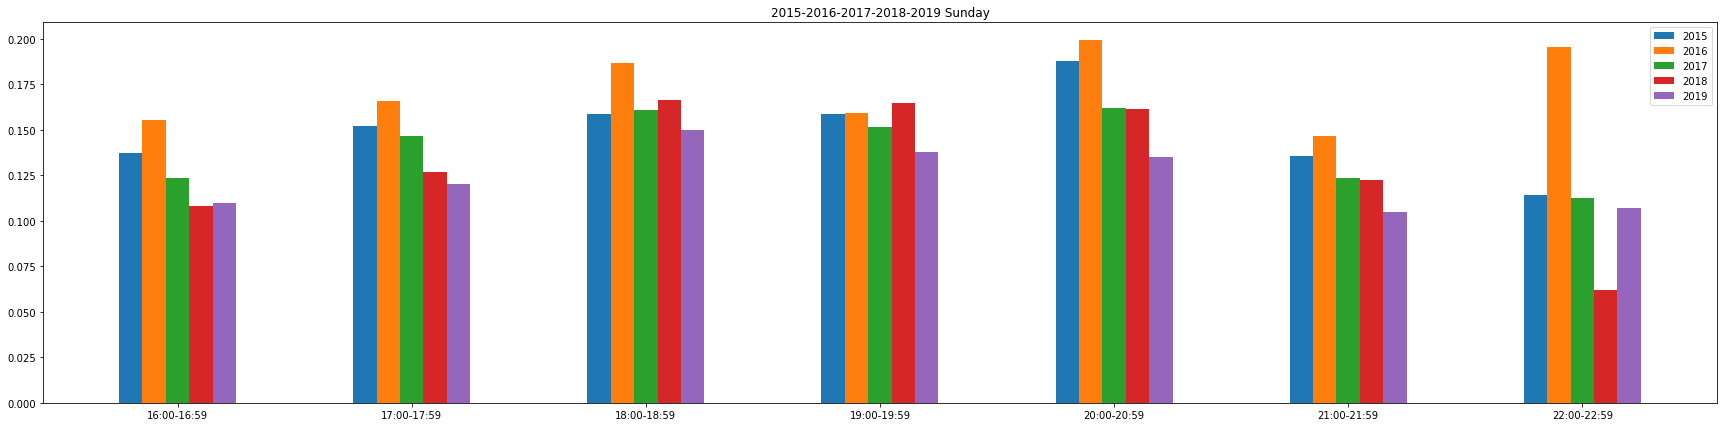

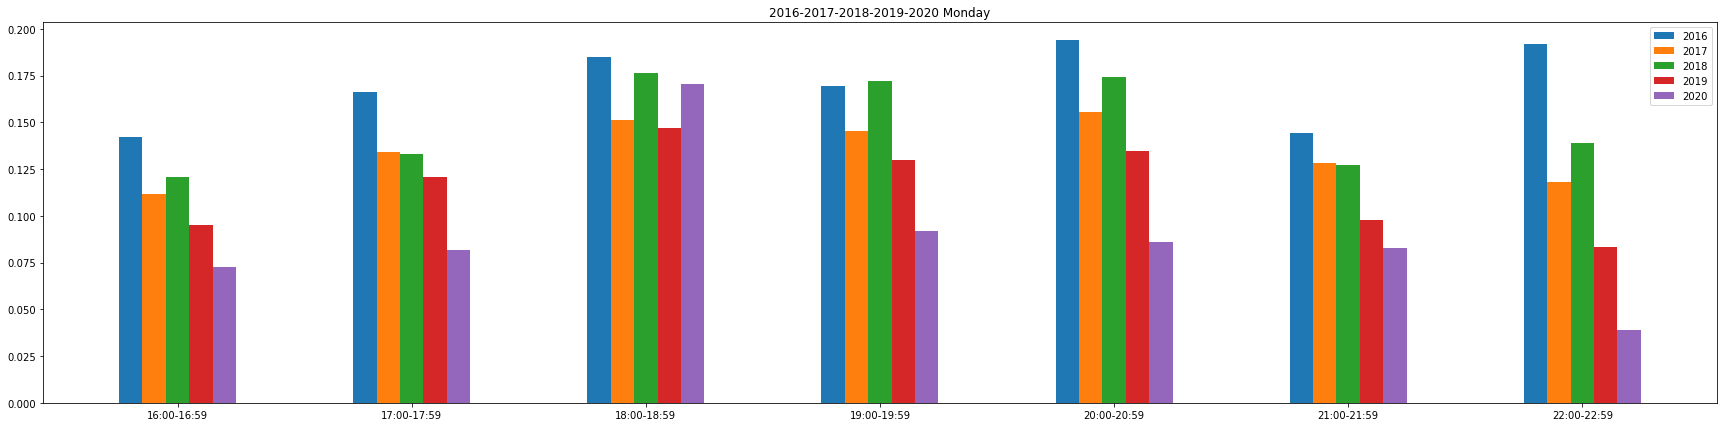

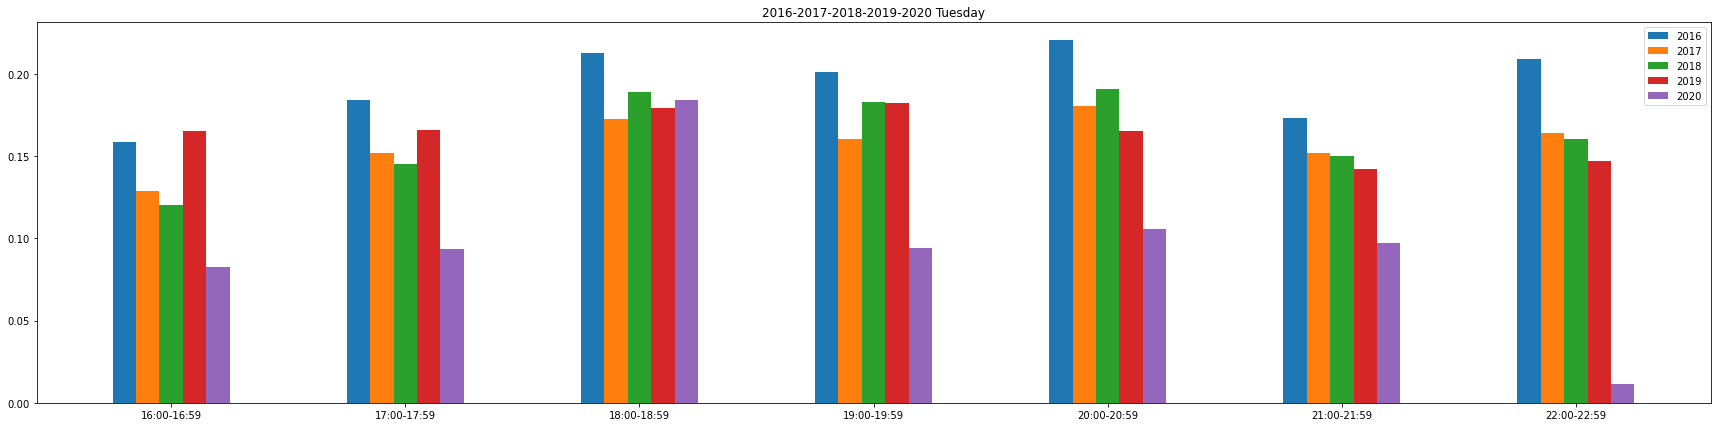

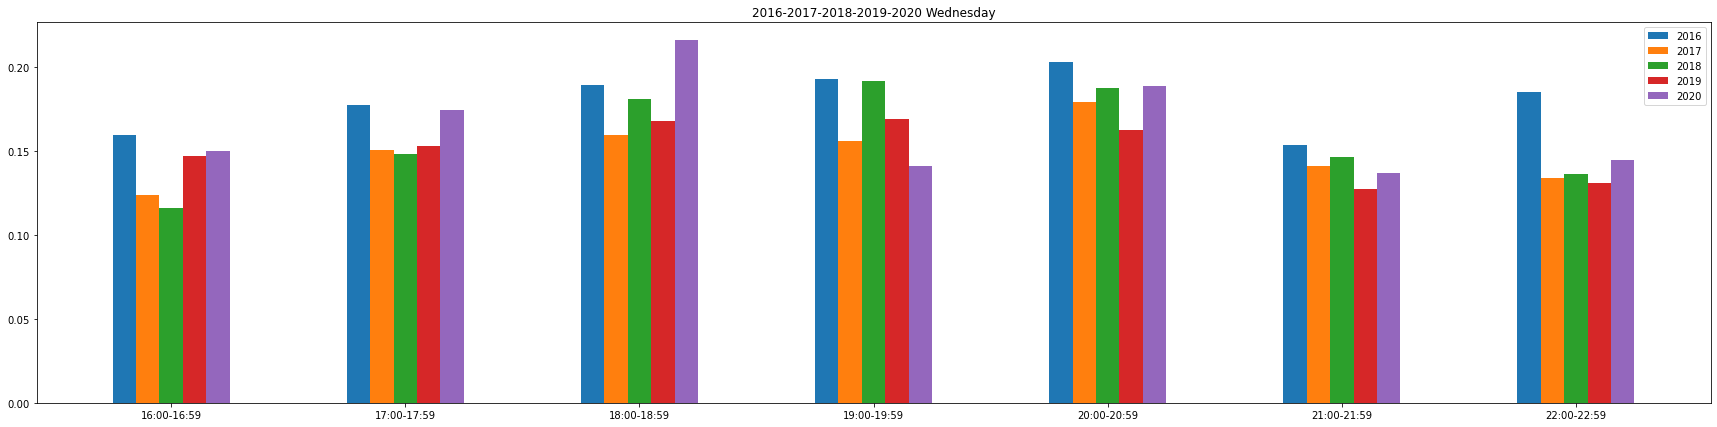

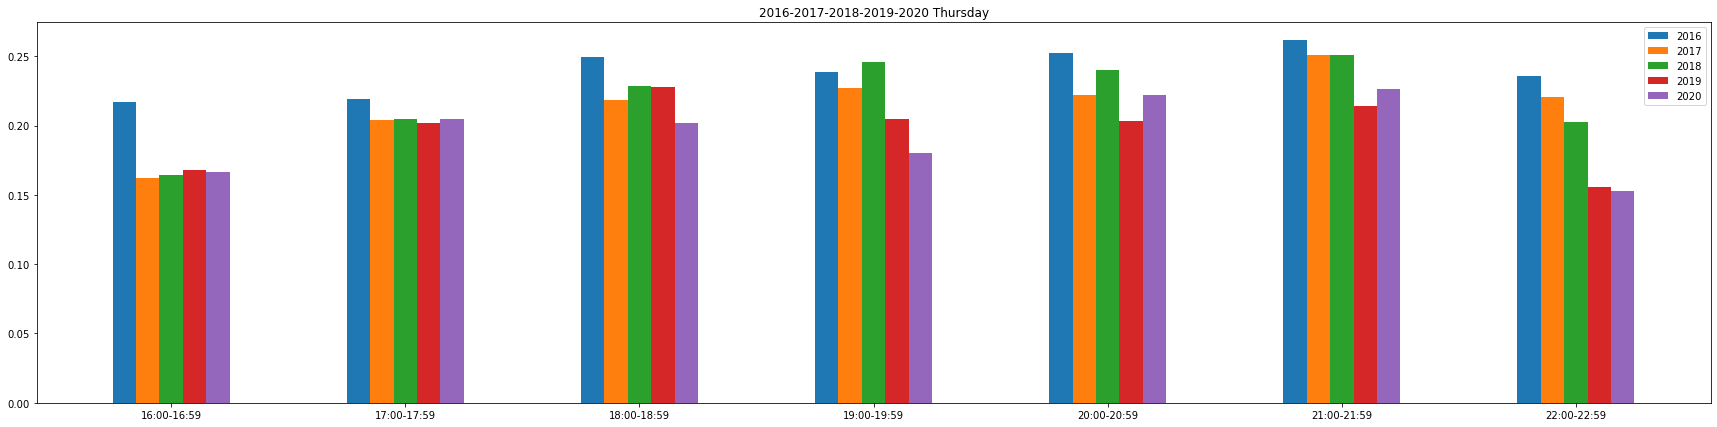

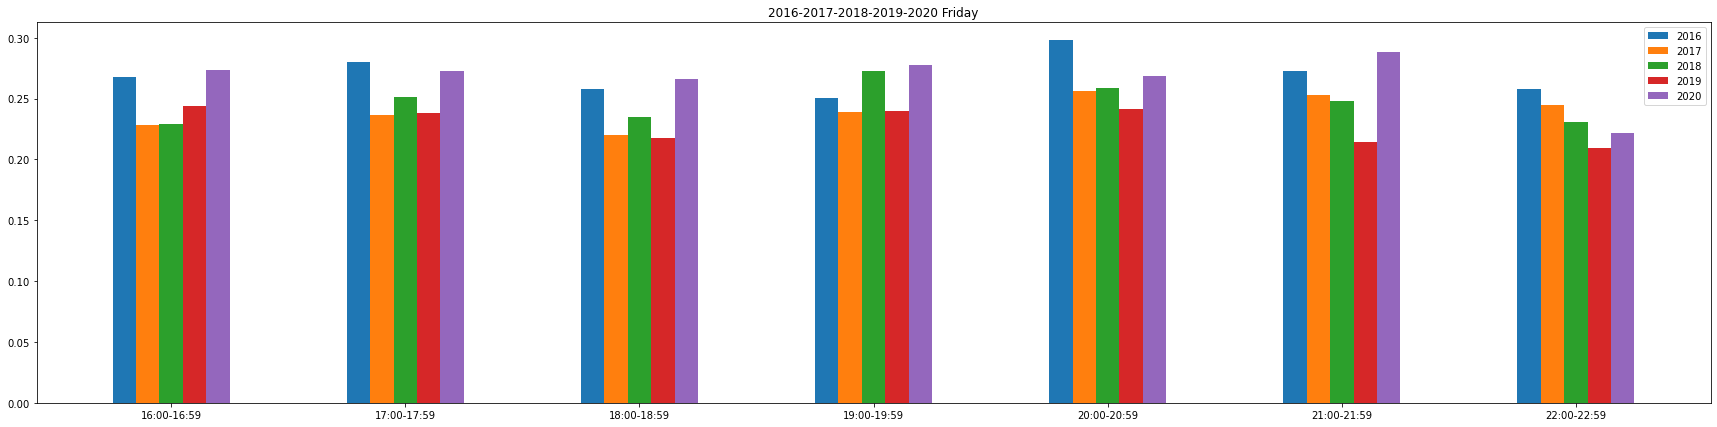

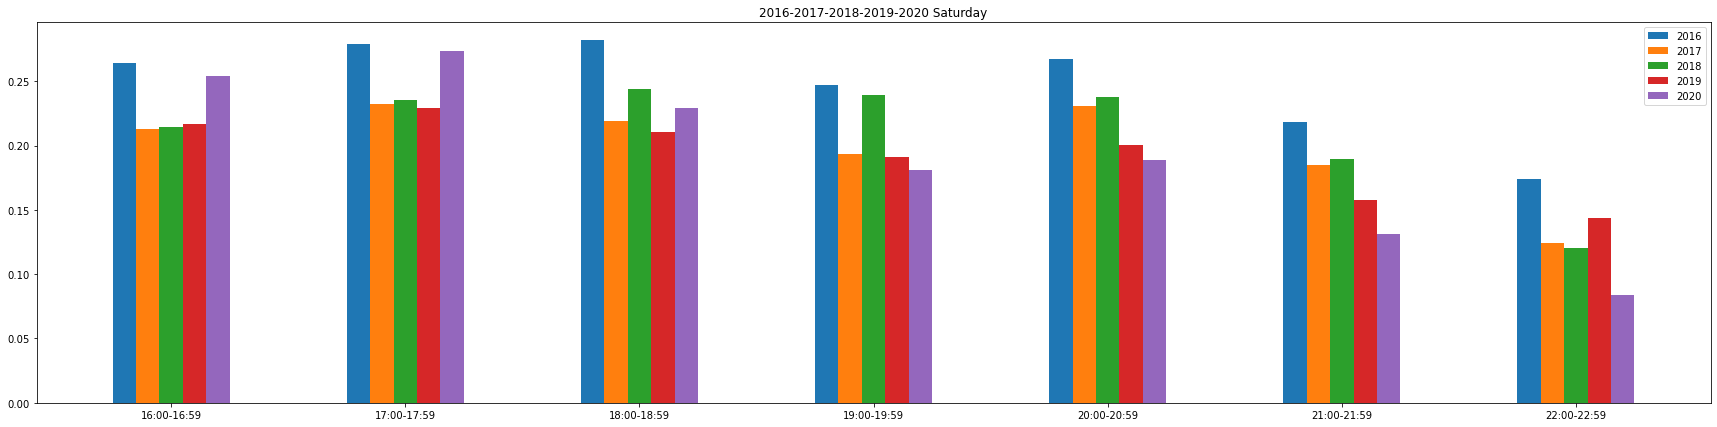

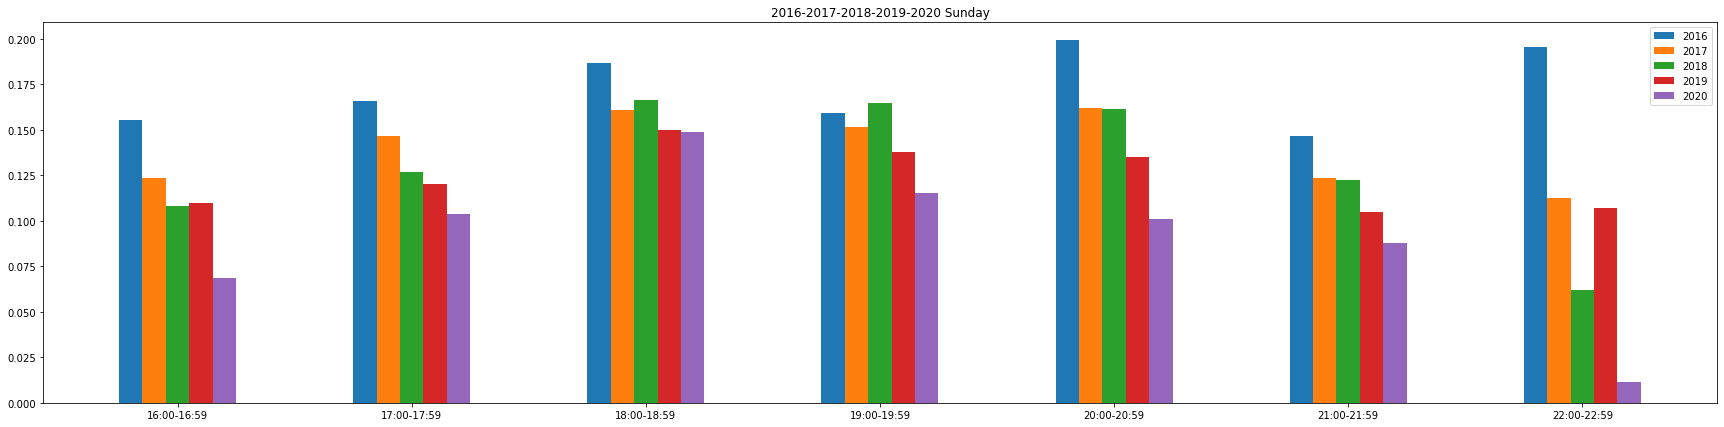

In [9]:
for i in stats_prime:
    if i+4 == 2021: break
    for j in stats_prime[i]:
        five_bar_plot(stats_prime[i][j], stats_prime[i+1][j], stats_prime[i+2][j], stats_prime[i+3][j], stats_prime[i+4][j], 
                      title =str(i)+'-'+str(i+1)+'-'+str(i+2)+'-'+str(i+3)+'-'+str(i+4)+' '+j,
                      legend=(str(i), str(i+1), str(i+2), str(i+3), str(i+4)))